## Overview of Exploratory Data Analysis: Differential Features (Clay Court Version)

In the previous step (see Notebook 2: Feature_Development), numerous features were created out of the cleaned raw data (see Notebook 1: Cleaning_Wrangling). In this workbook, correlation heat mapping and scatterplots are constructed to provide an intuitive feel for the relationship between individual putatively predictive features and the target feature (% total points played in a given match won by a given player [0-100%]). Feedback from visual and numerical explorations in this EDA notebook has been used iteratively to shape adaptations/expansions/deletions of features developed in the prior stage.

Note that this is the first stage of the project where analysis is conducted completely separately for hard court and clay court performance. This split of the is a result of previous iterations of the modeling stage showing significant differences both in prediction quality and feature importance for the two surfaces. More to say about that in later notebooks. This is the clay court version of EDA.  

Currently, data (on a surface-specific basis) from years 2012-2019 are used in EDA/modeling for clay court matches (2015-2019 for the larger sample size/year hard court match sample), with an additional 3 years prior to that used for retrospective feature accrual (2009-2011 for clay court matches, 2012-2014 for hard court matches). Also, a threshold of minimum of 20 prior matches for BOTH players in a given match to be predicted on is employed. Not surprisingly, prediction accuracy is sensitive to the amount of data available to generate predictive features, as well as to the amount of data available to train and test the model. Critically, matches filtered out at the current point and beyond (ie, during modeling) WERE used for feature generation.
    * As an additional data inclusion reminder, matches played on grass (too low a sample size; also removed Davis Cup and Olympics matches for same reason as well as for their "odd" contexts) and matches where one player withdrew (usually for injury reason) either before the match or early on (<12 games in) in the match were filtered out and NOT included in feature generation (except for grass court matches in a very limited capacity to assess previous player experience level, travel burden and fatigue level when switching back to clay or hard courts). 

### Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df = pd.read_csv('../data/df_player_all_for_EDA.csv')

### Summaries of Data

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

### Filter Data 

Based on results of previous EDA and modeling iterations for clay courts, data (on a surface-specific basis) from years 2012-2019 are presently used in modeling. An additional 3 years prior to that (2009-2011) are used for retrospective match stats-based feature accrual PRIOR TO the modeling stage. In the present EDA iteration, only data from the modeling time range (2012-2019) are included.

Also, a low pass threshold of 20 prior matches in the entire sample on the same surface for BOTH players in a given match to be predicted is used in the modeling stage. This removes matches for which very little data for prediction is accrued for stats-based features. Earlier modeling iterations revealed that prediction accuracy is sensitive to the amount of data available to generate predictive features, as well as to the amount of data available to train and test the model. In congruity with these findings, matches between players in which one or both did not previously have 20 matches in the sample are filtered out in this EDA iteration as well.  

In [3]:
# Select Clay Court Surface matches only 
df_filter = df.loc[(df["t_surf"] == 1)]

In [4]:
# Select match year inclusion
df_filter = df_filter.loc[(df_filter["m_yr"] == 2019) | (df_filter["m_yr"] == 2018) | (df_filter["m_yr"] == 2017) | (df_filter["m_yr"] == 2016) | (df_filter["m_yr"] == 2015) | (df_filter["m_yr"] == 2014) | (df_filter["m_yr"] == 2013) | (df_filter["m_yr"] == 2012)]

In [5]:
# Now also will remove BOTH players from individual matches remaining in the surface-specific sample already filtered by year range
# where one or both players has played N or fewer matches prior to the one to be predicted on. 
df_low_pass = df_filter.loc[df_filter['p_matches_ss'] <= 20, 'm_num']
df_filter = df_filter[~df_filter['m_num'].isin(df_low_pass)]

In [6]:
df_filter["p_matches_ss"].min()

21.0

In [7]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7214 entries, 1576 to 40609
Columns: 685 entries, t_id to p_df_SvPtsWon%_ratio_l10_tw_ss_IO_SOS_adj_csp_diff
dtypes: float64(648), int64(30), object(7)
memory usage: 37.8+ MB


## 1. Heat Mapping By Feature Theme

### 1. Target Feature (% of Total Points Won Per Player in Match Being Predicted [0-100]) vs Past % of Total Points Won Per Player Features 

In [12]:
df_filter_tot_pts = df_filter[["p_tot_pts_won%", "p_tot_pts_won%_l60_tw_ss_diff", "p_tot_pts_won%_l10_tw_ss_diff", "p_tot_pts_won%_l60_tw_ss_SOS_adj_diff", "p_tot_pts_won%_l10_tw_ss_SOS_adj_diff"]]

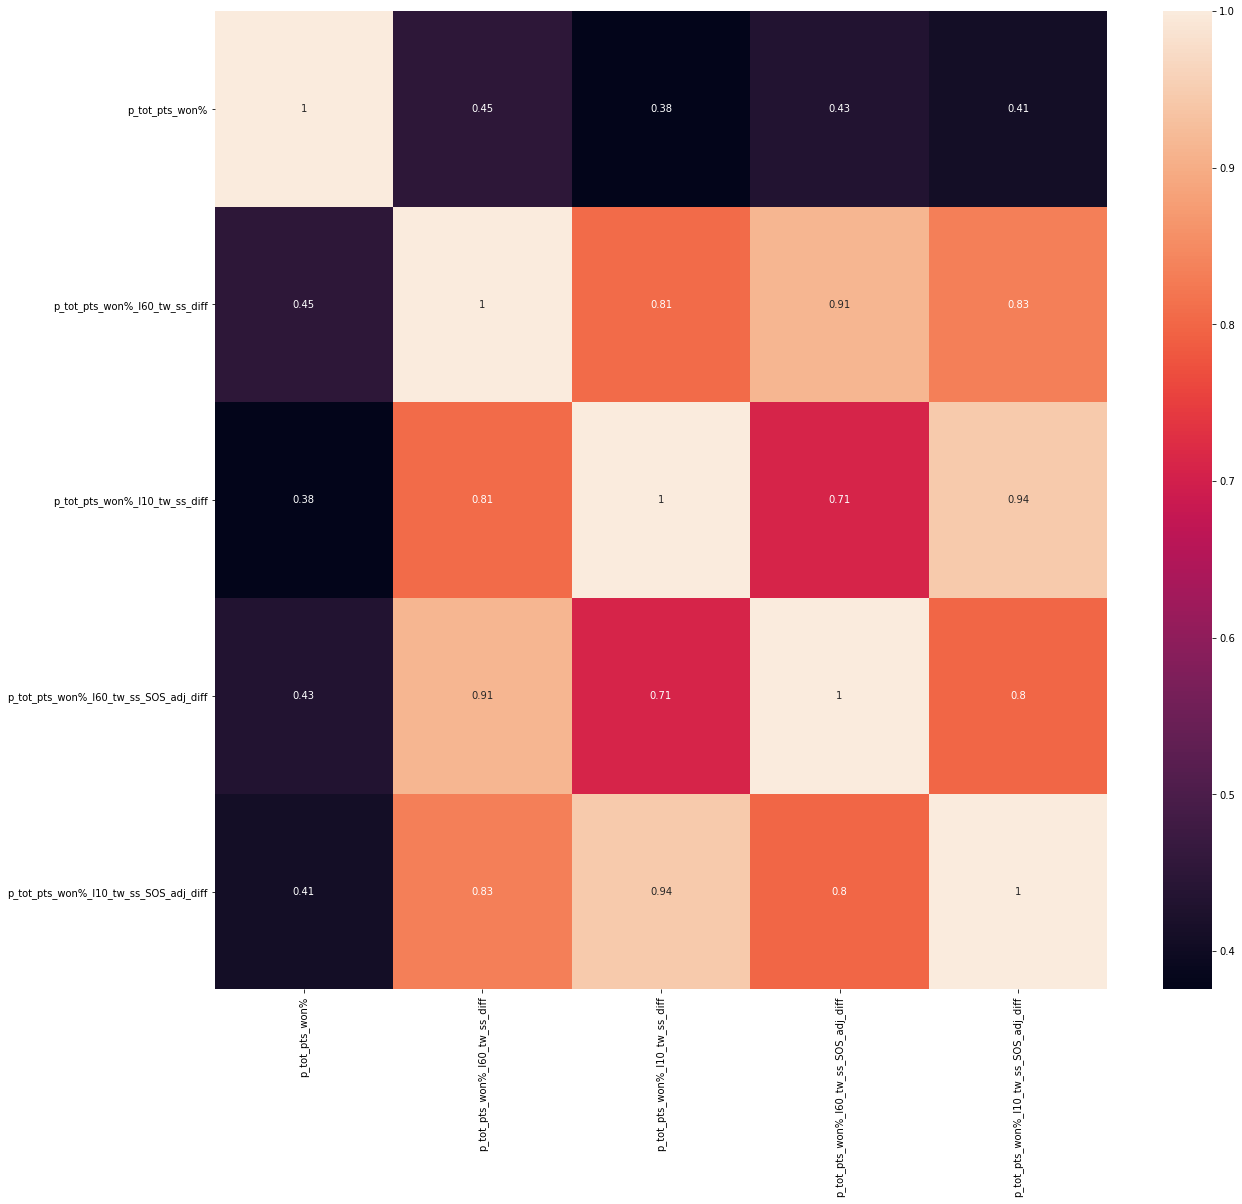

In [13]:
#Heatmap of correlations for tot_pts_won% vs "differential features"
plt.subplots(figsize=(20,18))
sns.heatmap(df_filter_tot_pts.corr(), annot = True);

Key Observations:
* Strong positive correlation to target (0.43) for surface-specific, time decay-weighted, strength of schedule (SOS)-adjusted % total points won plyer differential over the previous 60 matches ("long term" performance) in the match being predicted. 
* Short-term performance (previous 10 matches) has only a slightly lower positive correlation to the target feature (0.41), for the surface-specific, time decay-weighted, SOS-adjusted feature version. 
* Surprisingly, and in contrast to hard courts, SOS-adjustment actually leads to a slightly weaker positive correlation for the long term feature (l60) than decay time-weighting alone, though it improves correlation strength for short-term feature (l10)
* Unlike with hard courts, the indoor-outdoor distinction hardly matters for clay courts as there is only 1 or 2 tournaments per year indoors. Thus, those variants are not included in heat mapping. 
* Correlation strengths for this class of feature are marginally lower overall than for the same class in the hard court sample (see Hard Court version of this Notebook). Thoughts about this and the lower prediction quality for clay court vs hard court tennis are discussed (with further analysis) in the Github project summary. 

### 2. Target Feature vs Ranking-Related and Matchup-Specific Performance Features 

In [14]:
df_filter_rank_H2H = df_filter[["p_tot_pts_won%", "p_rk_diff", "p_log_rk_diff", "p_rk_pts_diff", "p_ent_diff", "p_hd_diff", "p_ht_diff", "p_age_diff", "p_HCA_diff", "p_H2H_w_ss_diff", "p_H2H_w_nss_diff", "p_H2H_tot_pts_won%_ss_diff", "p_H2H_tot_pts_won%_nss_diff"]]

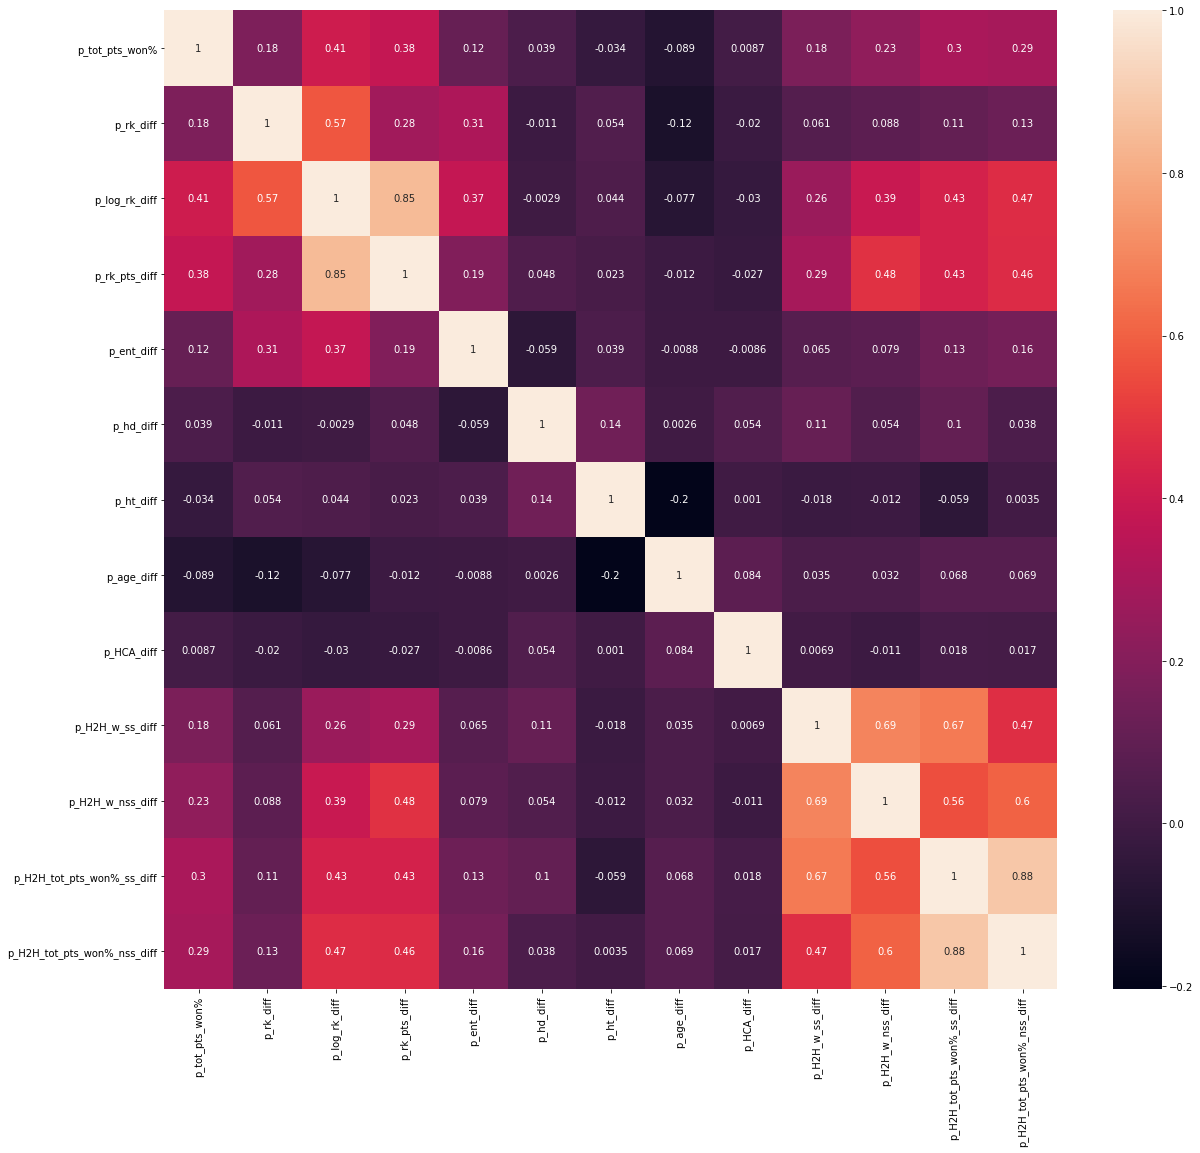

In [15]:
#Heatmap of correlations for tot_pts_won% vs "differential features"
plt.subplots(figsize=(20,18))
sns.heatmap(df_filter_rank_H2H.corr(), annot = True);

Key Observations:
* Difference in log of ranking between the two players in a match being predicted has a strong positive correlation (0.41), much stronger than ranking itself (0.18). This makes intuitve sense, since the point of the log transformation is to account for the fact that underlying ability level difference between the 1 and 100 players in the world is MUCH greater than that between the 600 and 700th ranked player. Ranking points somewhat captures this nonlinearity, and thus its correlation (0.38) to target is almost as strong as log of ranking to target.
* Past head-to-head performance at the points won level between two players in a match has a fairly strong positive correlation to target; ~0.3 when accounting for either just surface-specific (hard court) past encounters or encounters across surfaces (nss). Simply looking at H2H win-loss record in the past is not as highly positively correlated as the points level analysis. Interesting, the matches won-level correlation is stronger for all surfaces (.23) than just specifically for clay (.18) 
* Other "demographic" differences between two players in a match (e.g., height, handedness matchup, age, tourny entry type, home court advantage [HCA] for one or the other player) don't have overtly strong correlations to the target feature but may well still improve prediction accuracy when included in the modeling stage. 

### 3. Target Feature vs Travel, Surface Adaptation, Stamina and Fatigue-Related Features

In [16]:
df_filter_TSSF = df_filter[["p_tot_pts_won%", "p_tot_time_l7d_tw_diff", "p_tot_pts_l7d_tw_diff", "p_body_battery_t_tw_diff", "p_body_battery_pts_tw_diff", "p_matches_ss_diff", "p_matches_nss_diff", "p_surf_chg_diff", "p_tz_chg_diff"]]

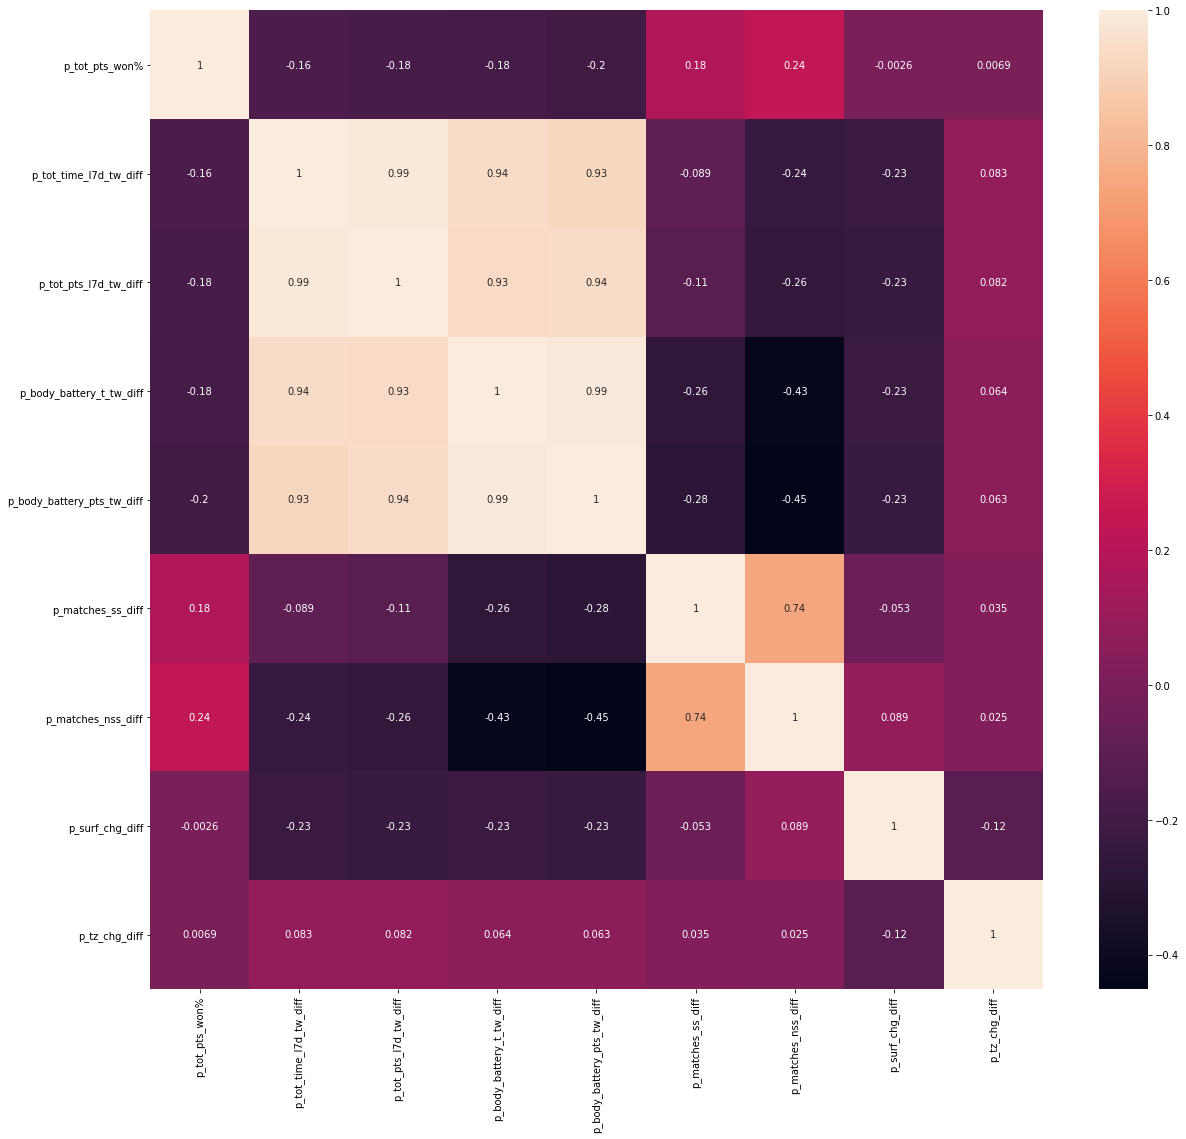

In [17]:
#Heatmap of correlations for tot_pts_won% vs "differential features"
plt.subplots(figsize=(20,18))
sns.heatmap(df_filter_TSSF.corr(), annot = True);

Key Observations:
* Even though the correlations are as strong as the total points features or rankings ones, there's some potentially interesting stuff here that may improve prediction quality. The negative correlations (-0.16, -0.18, respectively) between decay-weighted time and total points on court in the previous 7 days before a match suggests that relative fatigue negatively impacts performance. Body battery integrates recent time/points on court with built up stamina, and it's encouring to see that the correlations are stronger for this integrated metric (-0.18, -0.2, respectively) than for simply time/points spent on court in the last week without the context of how much stamina the player involved has built up.
* Not surprisingly, more previous matches is positively correlated with better performance, since the better the player the more matches they will accrue on the top level of the tour. There is probably an inversion of this effect at the very high end of matches played just due to correlation with advanced age, though you wouldn't know it looking at say Djokovic or Nadal in their late 30s. 
* I'm optimistic that capturing relative player time zone (tz) change and surface change will contribute beneficially to the predictive model, though the correlations of these features to target are relatively modest. These features may really "pop" for first round matches though. 

### 4. Target Feature vs Past % of Serve Points Won Per Player Features 

In [18]:
df_filter_sv_pts = df_filter[["p_tot_pts_won%", "p_sv_pts_won%_l60_tw_ss_diff", "p_sv_pts_won%_l10_tw_ss_diff", "p_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_sv_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_sv_pts_won%_l10_tw_ss_SOS_csp_adj_diff"]]

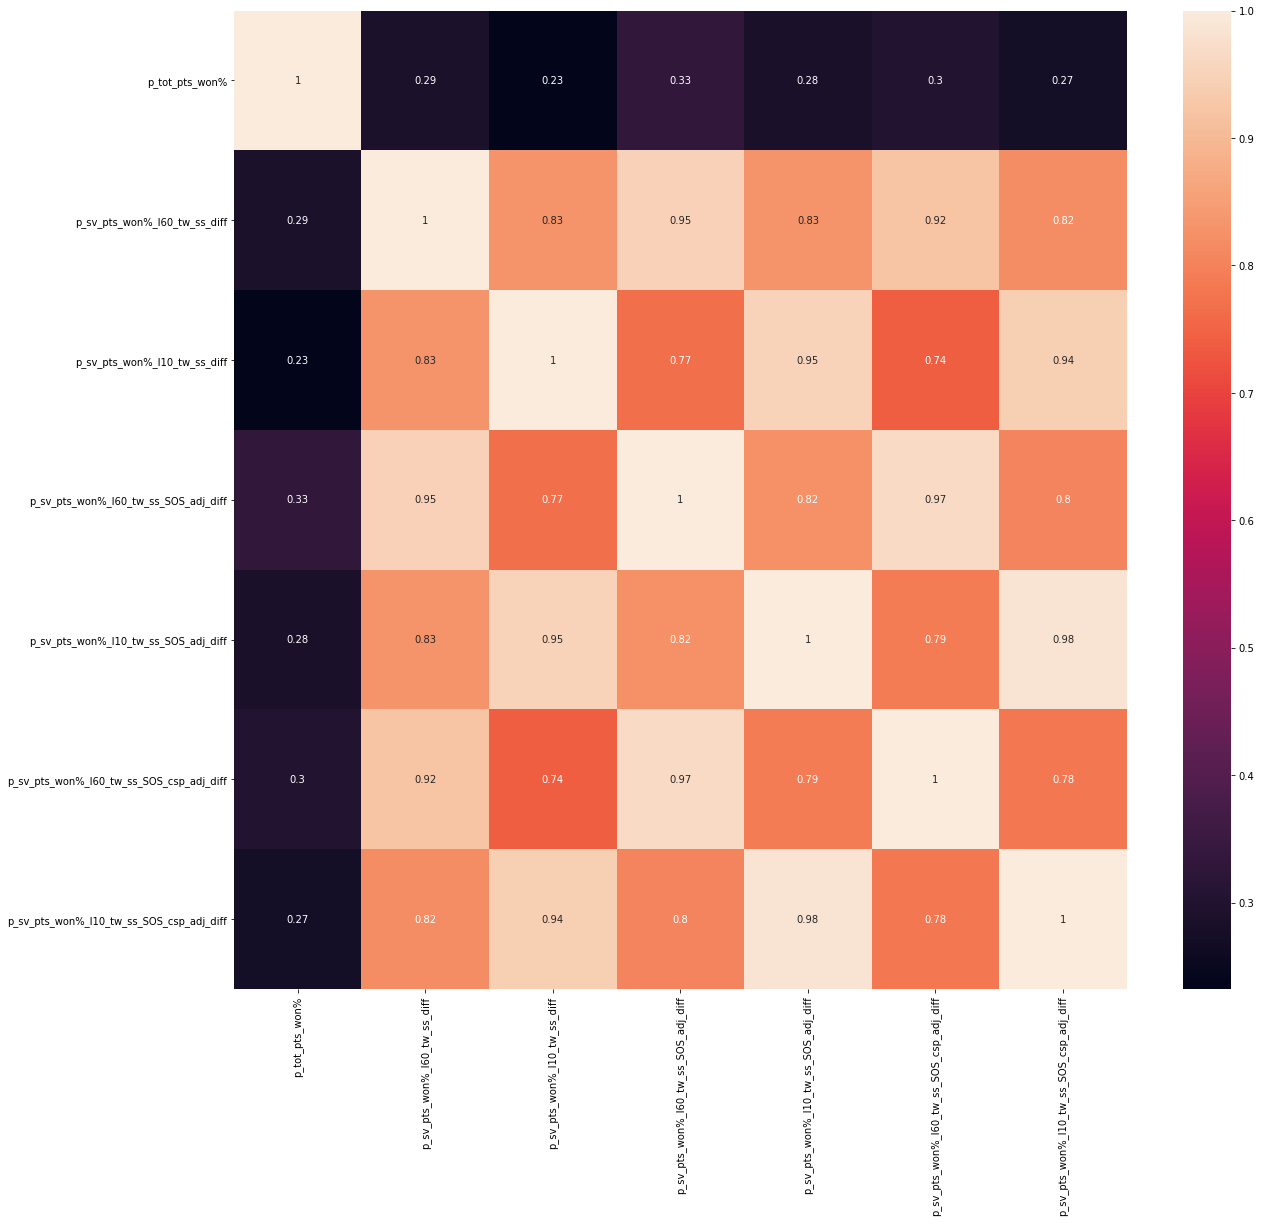

In [19]:
#Heatmap of correlations for tot_pts_won% vs "differential features"
plt.subplots(figsize=(20,18))
sns.heatmap(df_filter_sv_pts.corr(), annot = True);

Key Observations:
* Trends in correlation to target are the same as for total points won past performance features, though the correlations are not as strong. Versions including "court speed proxy" have slightly weaker correlations to target than versions without. 

### 4a. Target Feature vs Past % of First and Second Serve Points Won Per Player Features 

In [22]:
df_filter_1st_2nd_sv_pts = df_filter[["p_tot_pts_won%", "p_1st_sv_pts_won%_l60_tw_ss_diff", "p_1st_sv_pts_won%_l10_tw_ss_diff", "p_1st_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_sv_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_1st_sv_pts_won%_l10_tw_ss_SOS_csp_adj_diff", "p_2nd_sv_pts_won%_l60_tw_ss_diff", "p_2nd_sv_pts_won%_l10_tw_ss_diff", "p_2nd_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_sv_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_2nd_sv_pts_won%_l10_tw_ss_SOS_csp_adj_diff"]]

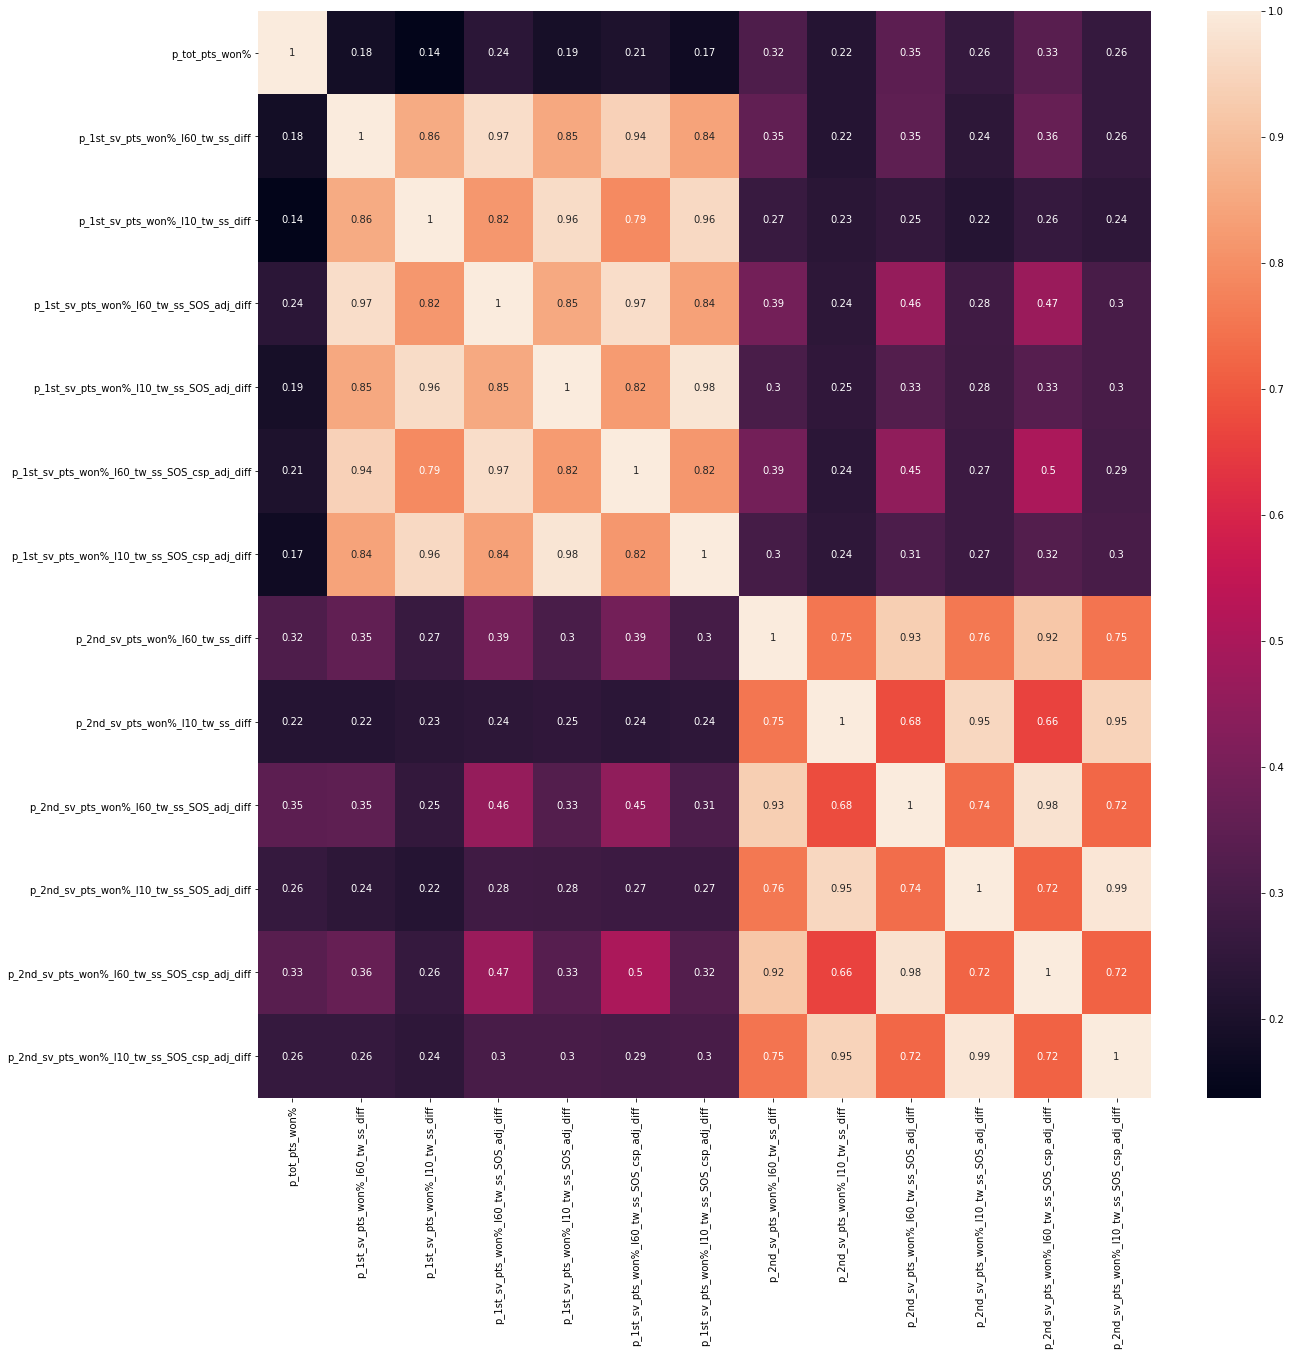

In [23]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_1st_2nd_sv_pts.corr(), annot = True);

Key Observations:
* What's immediately striking here is how much more positively correlated to the target feature SECOND serve performance is than FIRST serve performance. The long-term (l60), TW, SOS-adjusted version for SECOND serve performance has positive correlation to target of 0.36 vs .26 for equivalent first serve version.  

### 5. Target Feature vs Past % of Return Points Won Per Player Features 

In [24]:
df_filter_ret_pts = df_filter[["p_tot_pts_won%", "p_ret_pts_won%_l60_tw_ss_diff", "p_ret_pts_won%_l10_tw_ss_diff", "p_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_ret_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_ret_pts_won%_l10_tw_ss_SOS_csp_adj_diff"]]

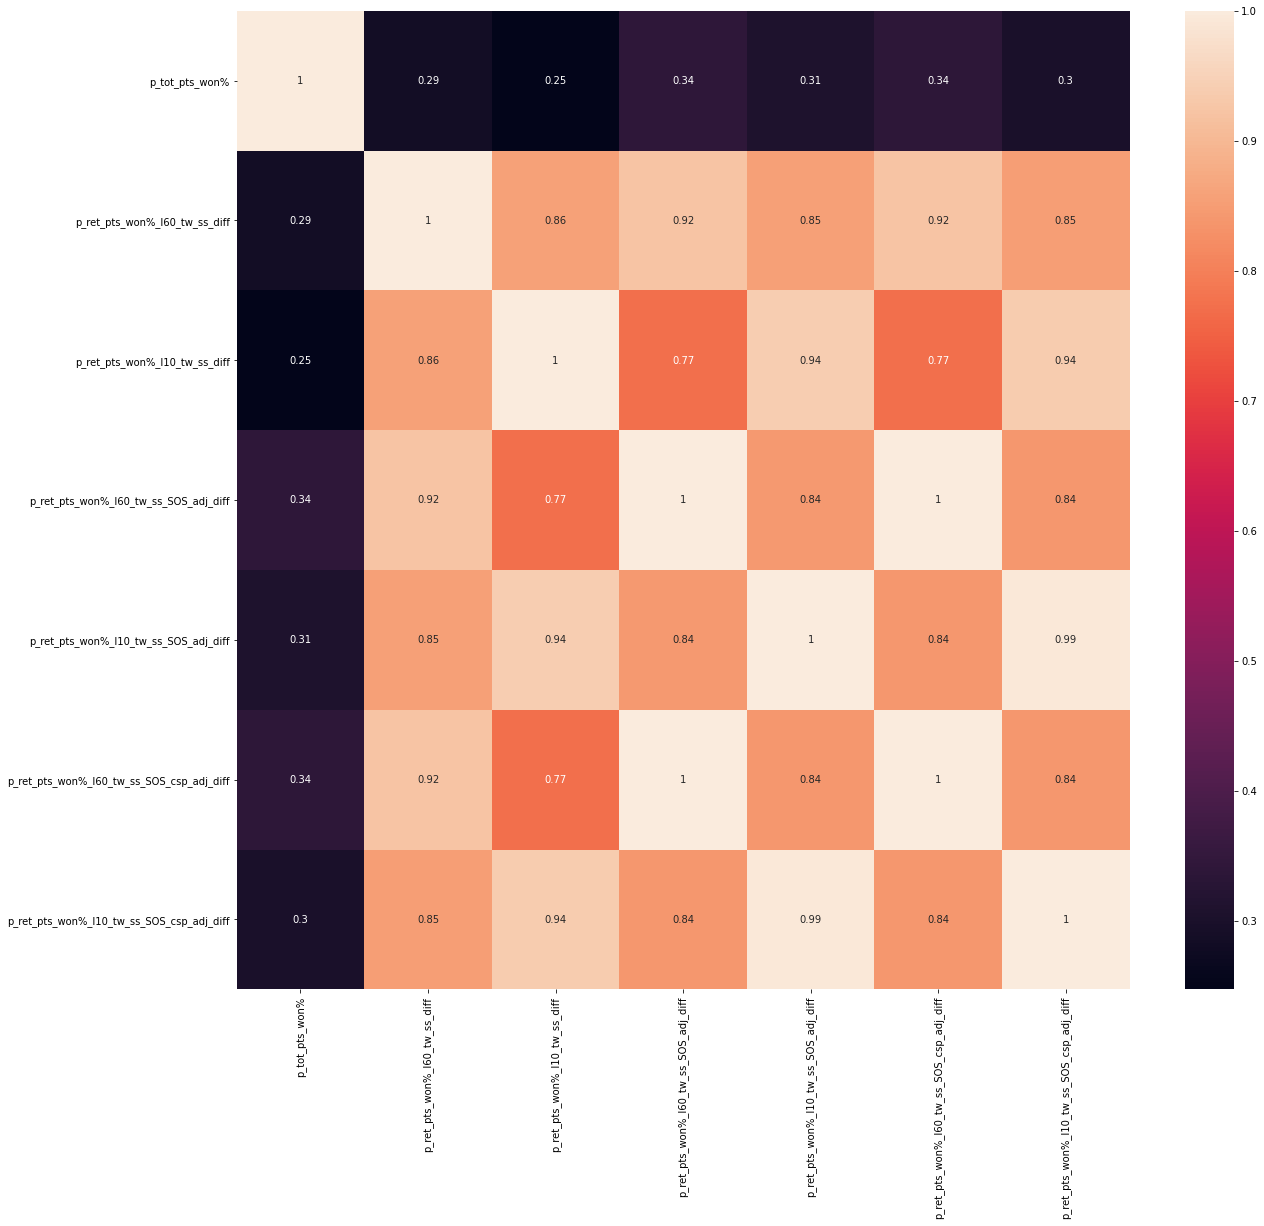

In [25]:
#Heatmap of correlations for tot_pts_won% vs "differential features"
plt.subplots(figsize=(20,18))
sns.heatmap(df_filter_ret_pts.corr(), annot = True);

Key Observations:
* Trends in correlation to target are the same as for total points won past performance features, though the correlations are not as strong. Versions including "court speed proxy" have slightly weaker correlations to target than versions without. 

### 5a. Target Feature vs Past % of First and Second Return Points Won Per Player Features 

In [26]:
df_filter_1st_2nd_ret_pts = df_filter[["p_tot_pts_won%", "p_1st_ret_pts_won%_l60_tw_ss_diff", "p_1st_ret_pts_won%_l10_tw_ss_diff", "p_1st_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_ret_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_1st_ret_pts_won%_l10_tw_ss_SOS_csp_adj_diff", "p_2nd_ret_pts_won%_l60_tw_ss_diff", "p_2nd_ret_pts_won%_l10_tw_ss_diff", "p_2nd_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_ret_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_2nd_ret_pts_won%_l10_tw_ss_SOS_csp_adj_diff"]]

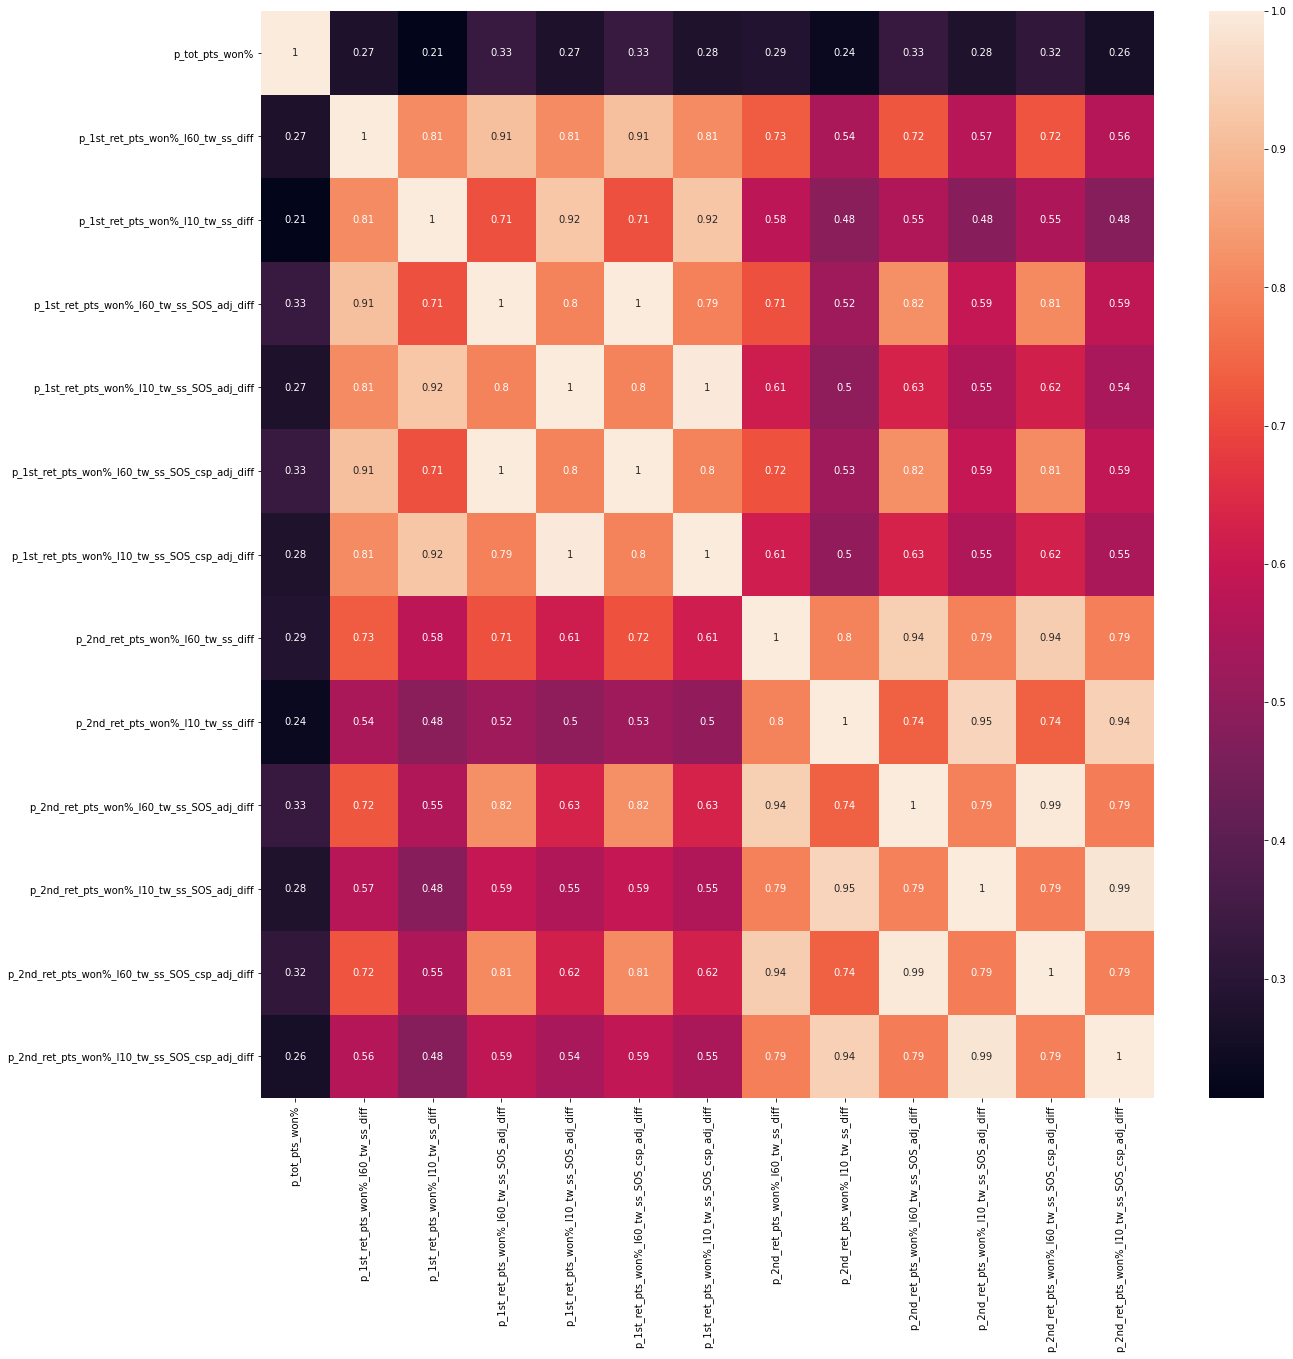

In [27]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_1st_2nd_ret_pts.corr(), annot = True);

Key Observations:
* Interestingly, in contrast to first and second serve performance, first serve RETURN performance is equally correlated to target feature than second serve RETURN performance. Also interesting is that the court speed proxy version is slightly more highly correlated to target than the non-csp version, at least for FIRST return performance.
* There's a difference here vs the hard court correlations. On hard courts, first serve RETURN performance is more highly correlated to target feature than second serve RETURN performance. Makes intuitive sense because first serves are less impactful on clay courts, as the surfacer slows the ball down on impact with the court way more than the hard court surface does.

### 6. Target Feature vs Past Implied Win Probability Features

In [28]:
df_filter_IWP = df_filter[["p_tot_pts_won%", "p_AVG_C_IP_l60_tw_ss_SOS_adj_diff", "p_AVG_C_IP_l10_tw_ss_SOS_adj_diff", "p_AVG_C_IP_l60_tw_nss_SOS_adj_diff", "p_AVG_C_IP_l10_tw_nss_SOS_adj_diff"]]

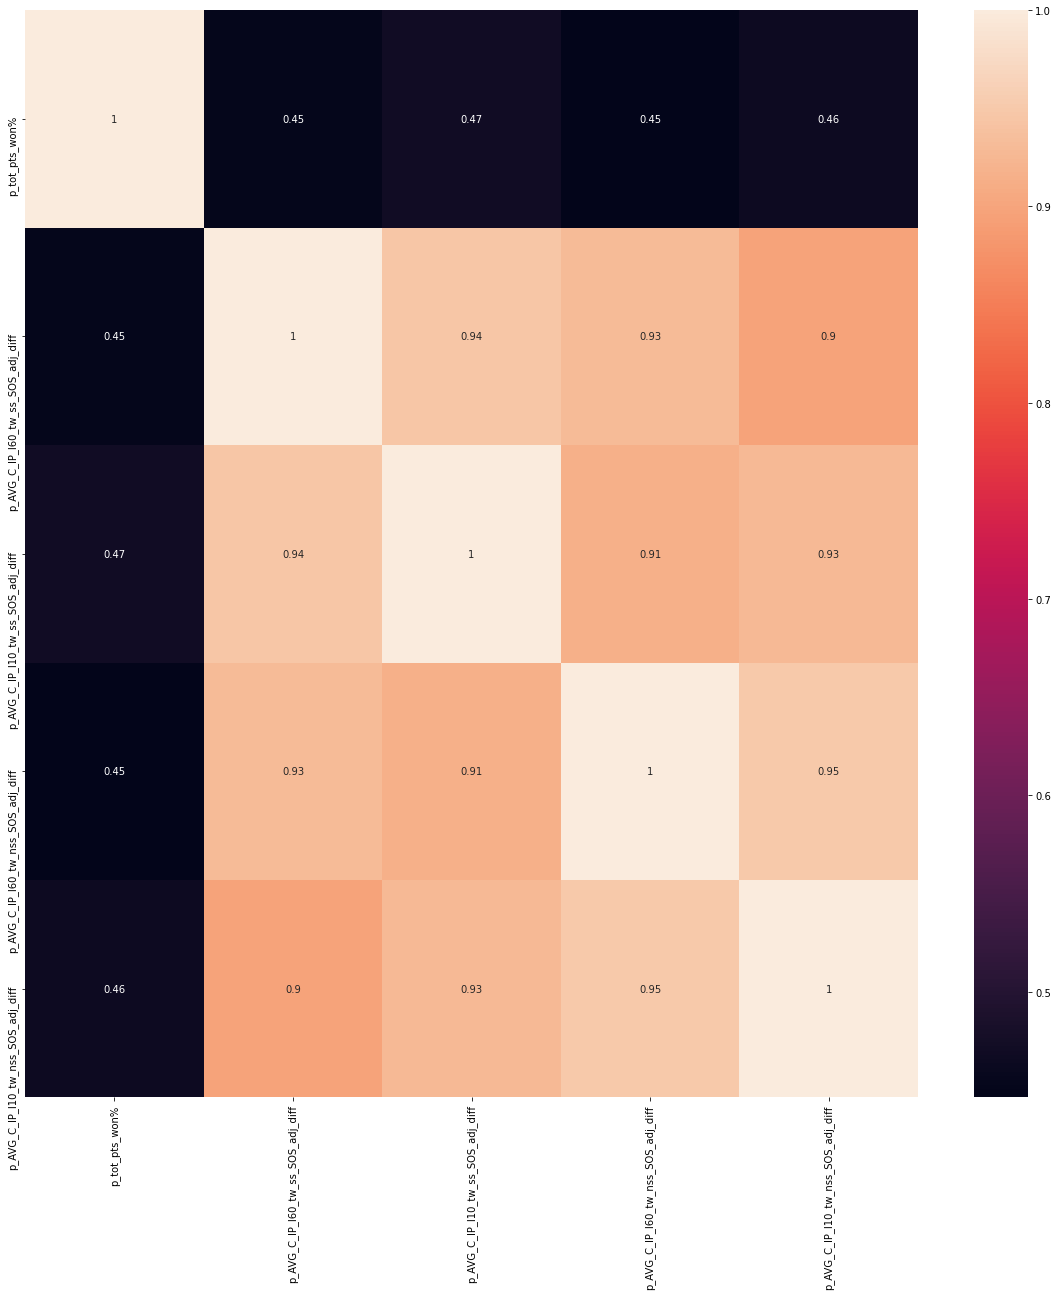

In [29]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_IWP.corr(), annot = True);

Key Observations:
* Implied win probability (derived from historical wagering lines) from past matches (but NOT the current match, because that would be data leakage/cheating) is strongly positively correlated to target feature. This is not surprising at all because the averaged closing lines from which these features are derived reflect "market wisdom" about individual players. These correlations rival the best stats-based correlations in their strength. 
* Interestingly, these correlations are slightly stronger for the short term versions than for the long term versions. The implication is that the market is good at sussing out variables that correlate to short term performance fluctuations (and maybe this also suggests that my short-term statistics-derived feature approach has room to improve!). 

### 7. Target Feature vs Past Ace Performance Features 

In [30]:
df_filter_ace = df_filter[["p_tot_pts_won%", "p_ace%_l60_tw_ss_diff", "p_ace%_l10_tw_ss_diff", "p_ace%_l60_tw_ss_SOS_adj_diff", "p_ace%_l10_tw_ss_SOS_adj_diff", "p_ace%_l60_tw_ss_SOS_csp_adj_diff", "p_ace%_l10_tw_ss_SOS_csp_adj_diff"]]

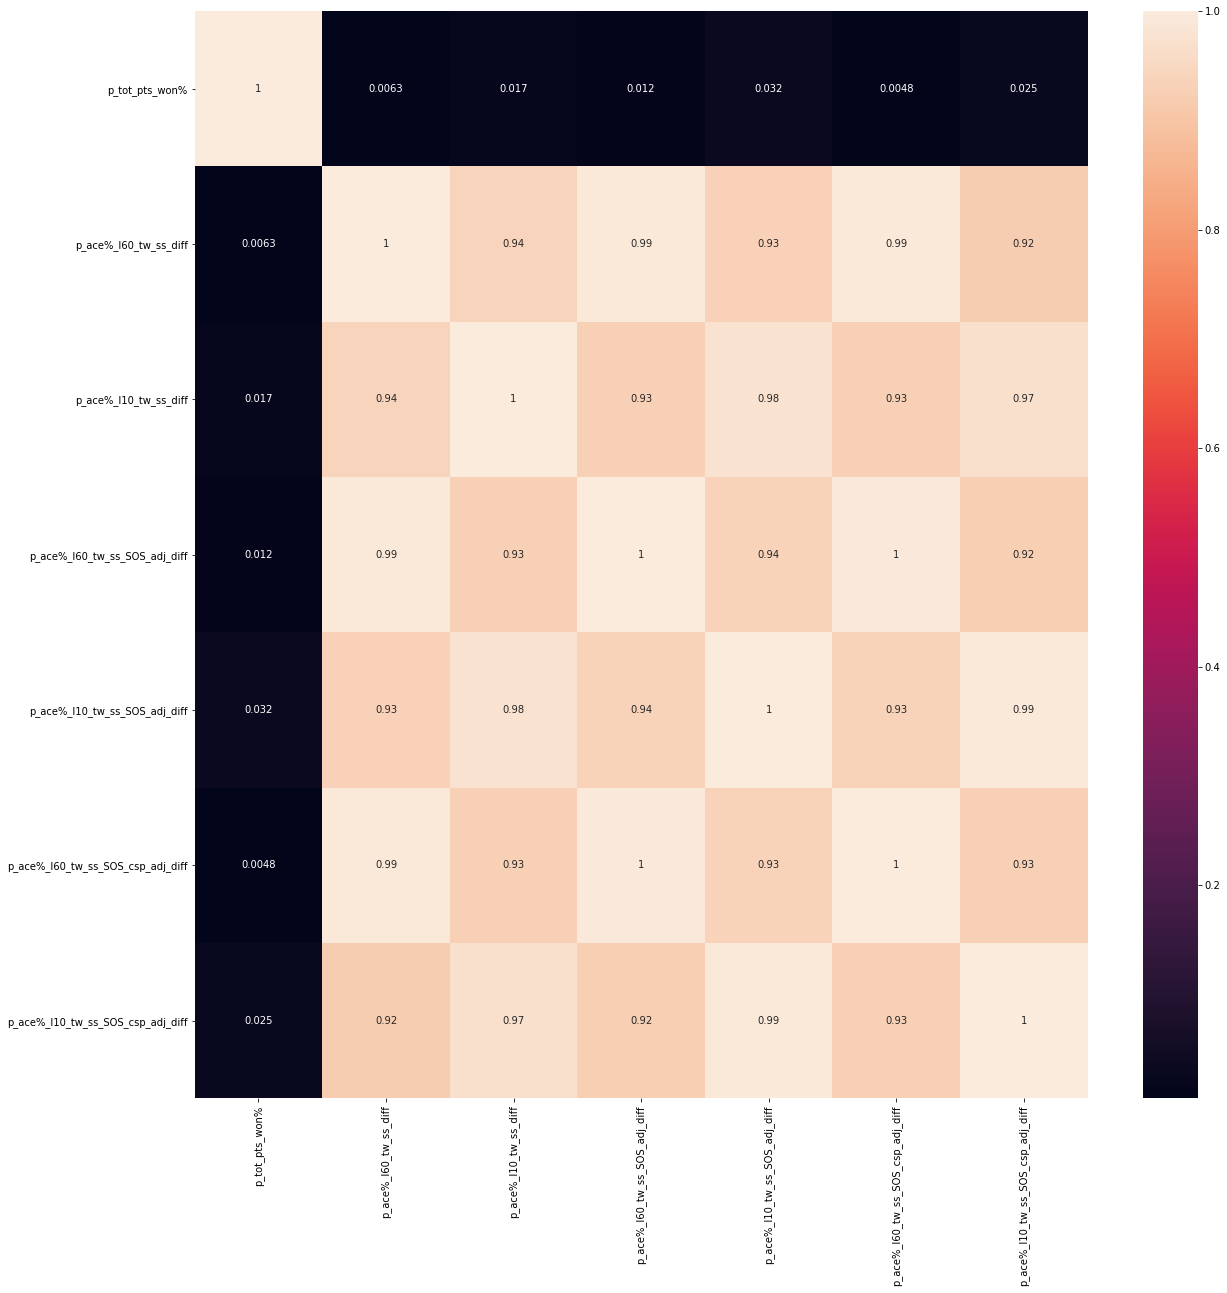

In [31]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_ace.corr(), annot = True);

### 8. Target Feature vs Past Double Fault Performance Features 

In [32]:
df_filter_df = df_filter[["p_tot_pts_won%", "p_df%_l60_tw_ss_diff", "p_df%_l10_tw_ss_diff", "p_df%_l60_tw_ss_SOS_adj_diff", "p_df%_l10_tw_ss_SOS_adj_diff", "p_df%_l60_tw_ss_SOS_csp_adj_diff", "p_df%_l10_tw_ss_SOS_csp_adj_diff"]]

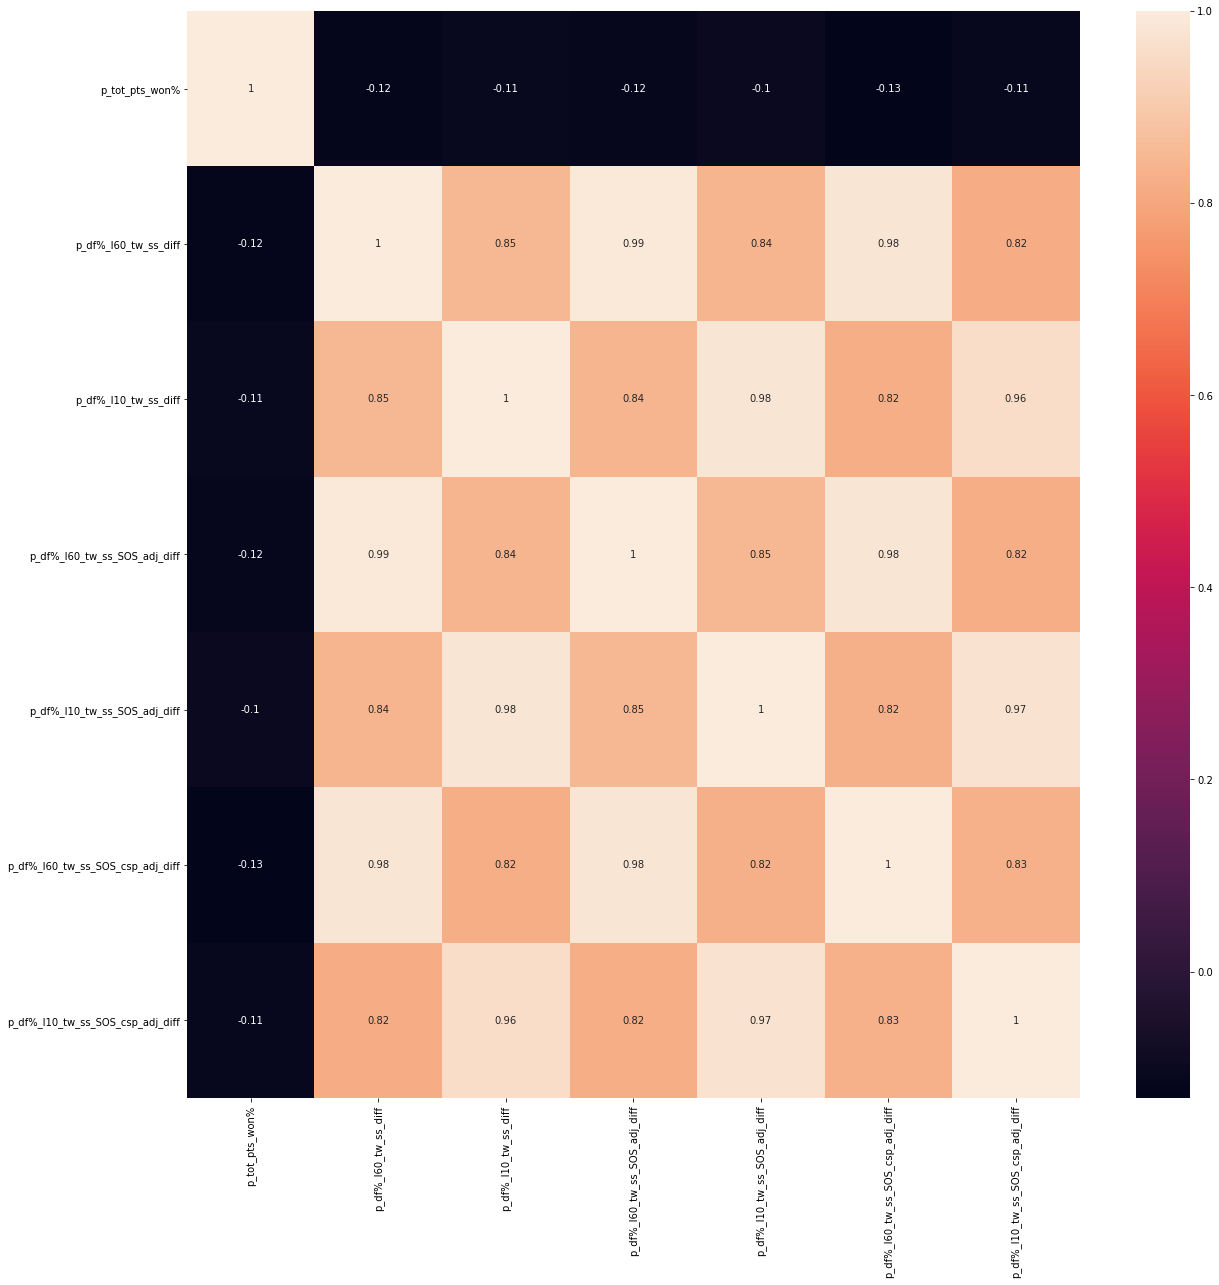

In [33]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_df.corr(), annot = True);

Key Observations:
* Interestingly, past double fault performance is more strongly (negatively) correlated to target feature than past ace performance (weak positive correlation). Not surprisingly, this is the reverse direction than on hard courts (moderate positive correlation for past aces, weak negative correlation for double faults).   

### 9. Target Feature vs Past Aced as Returner Performance Features 

In [34]:
df_filter_aced = df_filter[["p_tot_pts_won%", "p_aced%_l60_tw_ss_diff", "p_aced%_l10_tw_ss_diff", "p_aced%_l60_tw_ss_SOS_adj_diff", "p_aced%_l10_tw_ss_SOS_adj_diff", "p_aced%_l60_tw_ss_SOS_csp_adj_diff", "p_aced%_l10_tw_ss_SOS_csp_adj_diff"]]

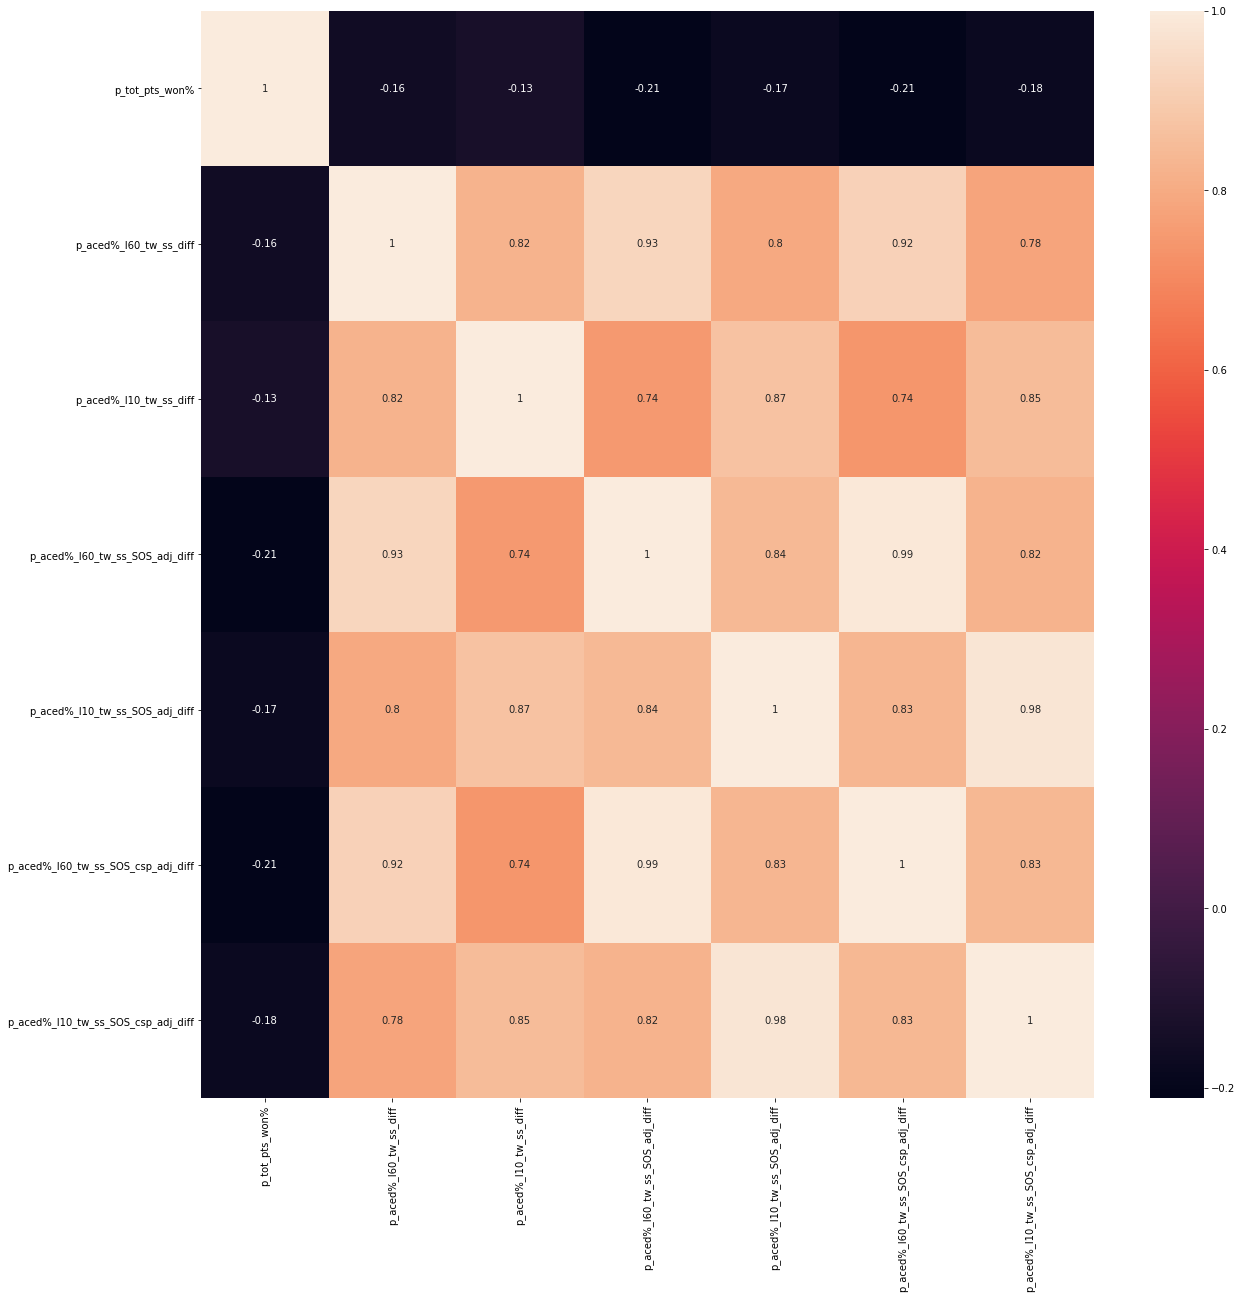

In [35]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_aced.corr(), annot = True);

Key Observations:
* It's very striking that aced as a returner performance correlates much more strongly to target feature than ace performance as a server. I'ts also interesting that the court speed proxy-adjusted version is slightly more highly correlated to target than the non-court speed adjusted version for the short term (l10) feature. 

### 10. Target Feature vs Past Double Fault Induce as Returner Performance Features 

In [36]:
df_filter_df_induce = df_filter[["p_tot_pts_won%", "p_df_induce%_l60_tw_ss_diff", "p_df_induce%_l10_tw_ss_diff", "p_df_induce%_l60_tw_ss_SOS_adj_diff", "p_df_induce%_l10_tw_ss_SOS_adj_diff", "p_df_induce%_l60_tw_ss_SOS_csp_adj_diff", "p_df_induce%_l10_tw_ss_SOS_csp_adj_diff"]]

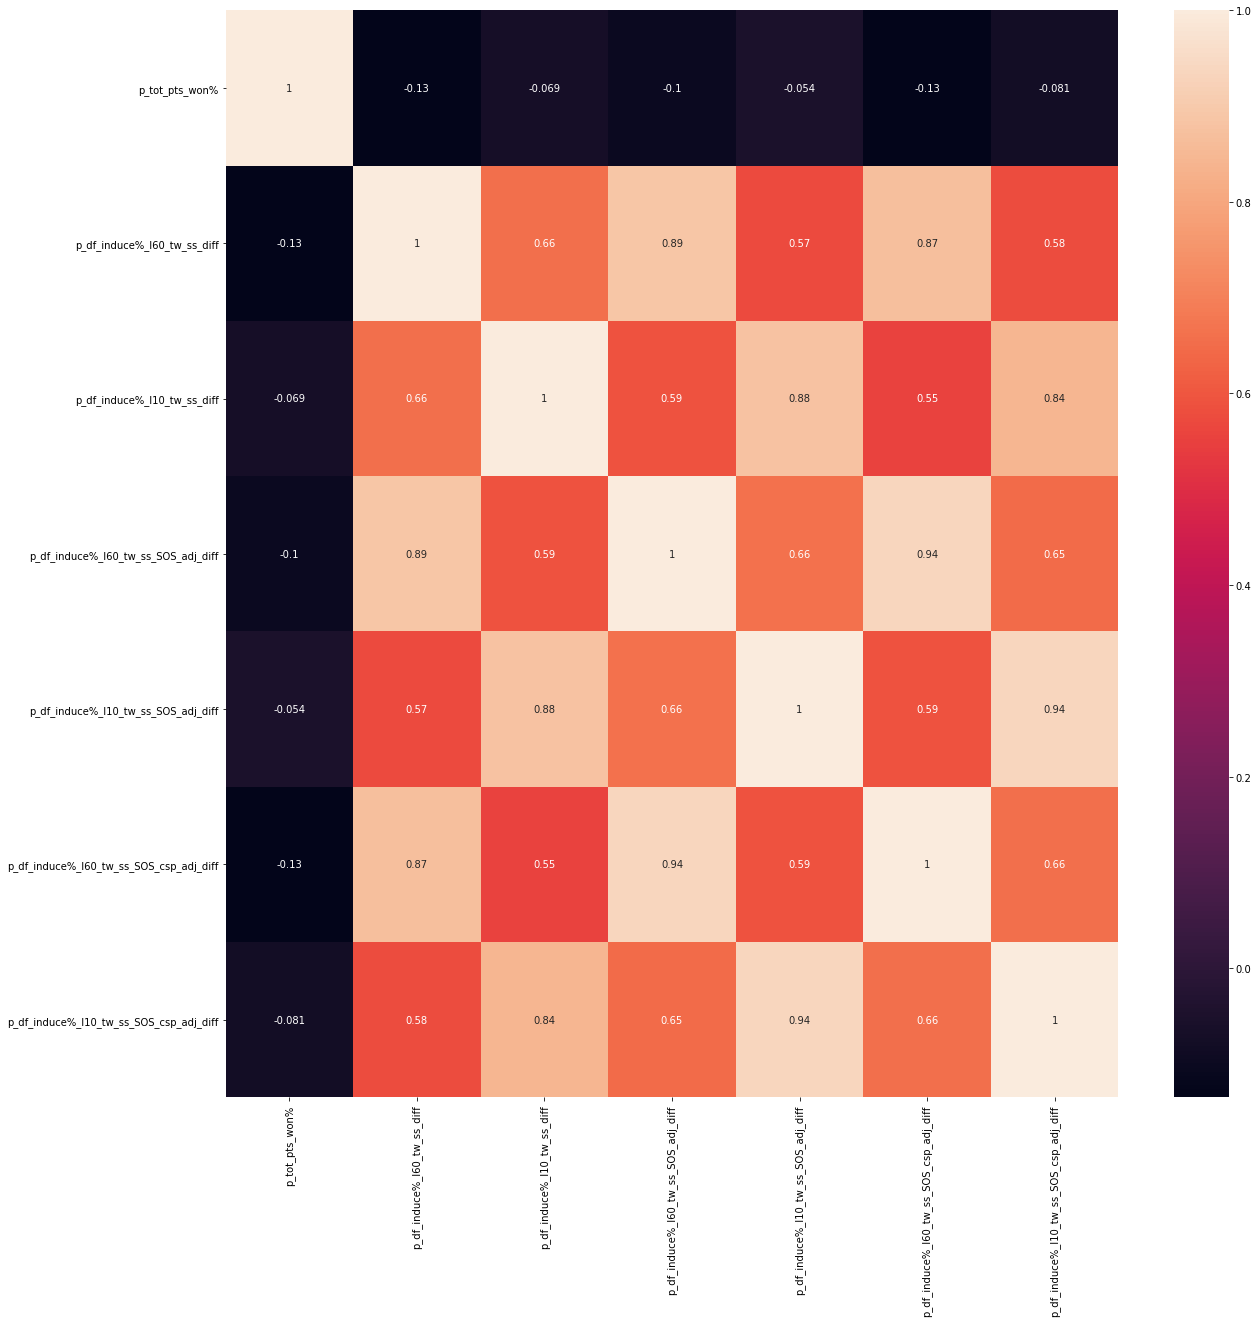

In [37]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_df_induce.corr(), annot = True);

Key Observations:
* Double fault "induction" might not be a robustly repeatable skill based on these correlation stengths (though they are higher than with the hard court data). But it may well still contribute a small amount to model quality. 

### 11. Target Feature vs Past Break Point Saved as Server Performance Features 

In [38]:
df_filter_bp_save = df_filter[["p_tot_pts_won%", "p_bp_save%_l60_tw_ss_diff", "p_bp_save%_l10_tw_ss_diff", "p_bp_save%_l60_tw_ss_SOS_adj_diff", "p_bp_save%_l10_tw_ss_SOS_adj_diff", "p_bp_save%_l60_tw_ss_SOS_csp_adj_diff", "p_bp_save%_l10_tw_ss_SOS_csp_adj_diff"]]

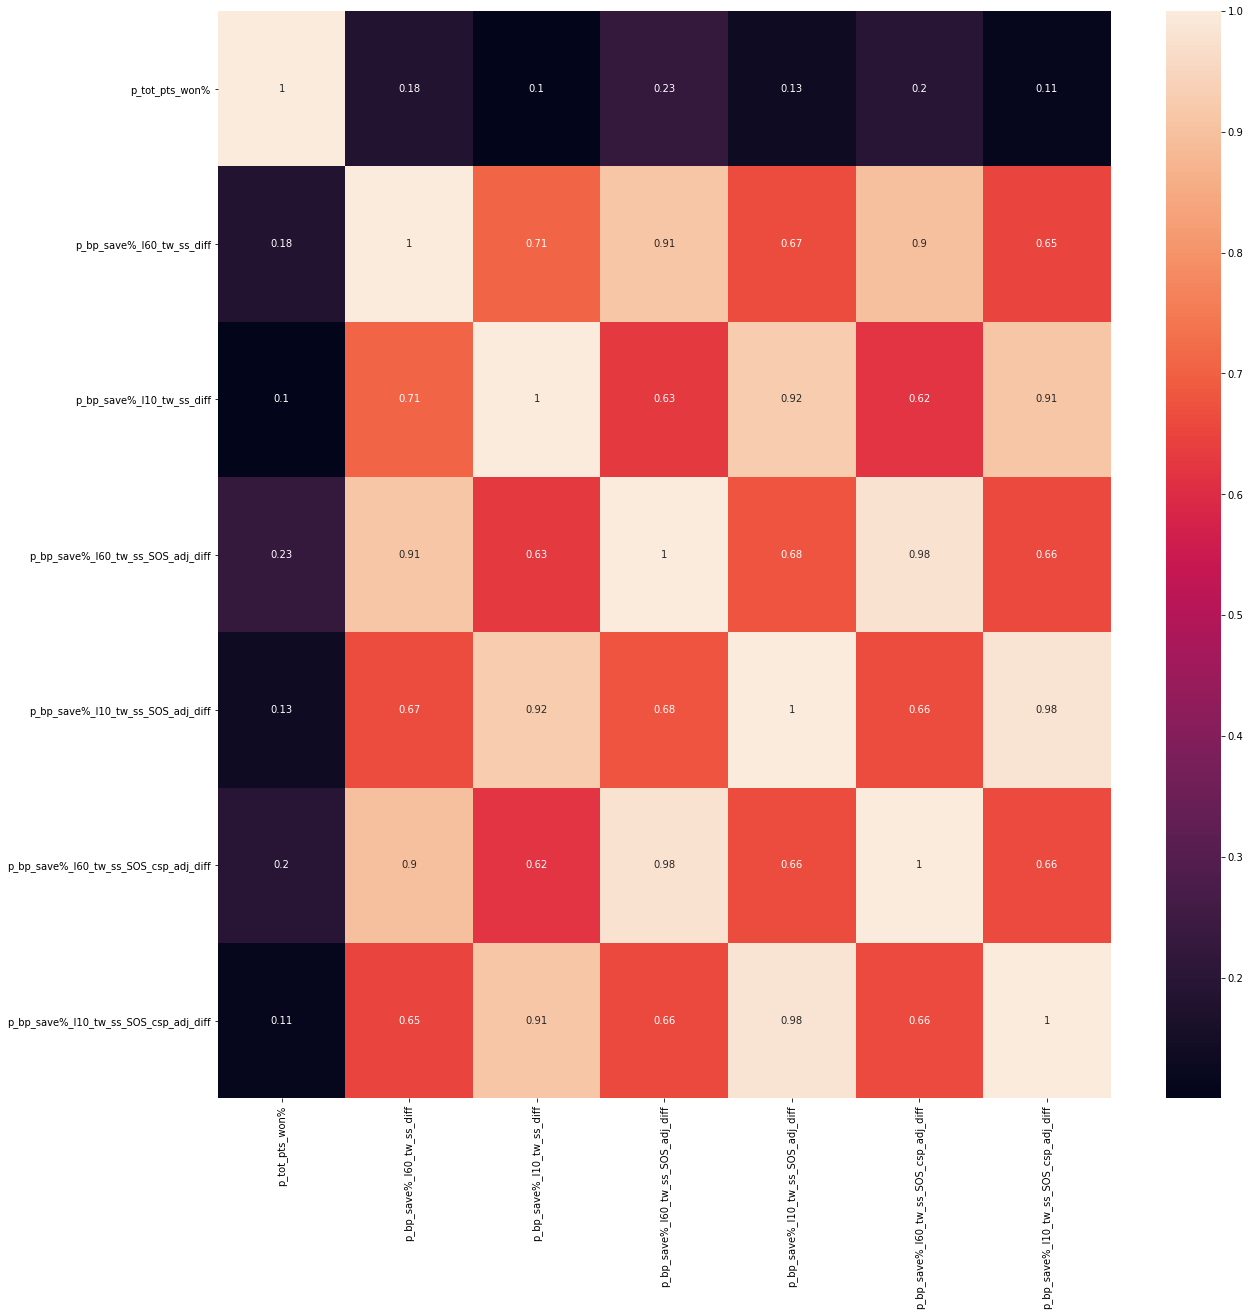

In [39]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_bp_save.corr(), annot = True);

Key Observations:
* Strength of Schedule Adjusted version of the long-term (l60) feature has a fairly strong (.23) correlation to target.

### 12. Target Feature vs Past Break Point Converted as Returner Performance Features

In [40]:
df_filter_bp_conv = df_filter[["p_tot_pts_won%", "p_bp_conv%_l60_tw_ss_diff", "p_bp_conv%_l10_tw_ss_diff", "p_bp_conv%_l60_tw_ss_SOS_adj_diff", "p_bp_conv%_l10_tw_ss_SOS_adj_diff", "p_bp_conv%_l60_tw_ss_SOS_csp_adj_diff", "p_bp_conv%_l10_tw_ss_SOS_csp_adj_diff"]]

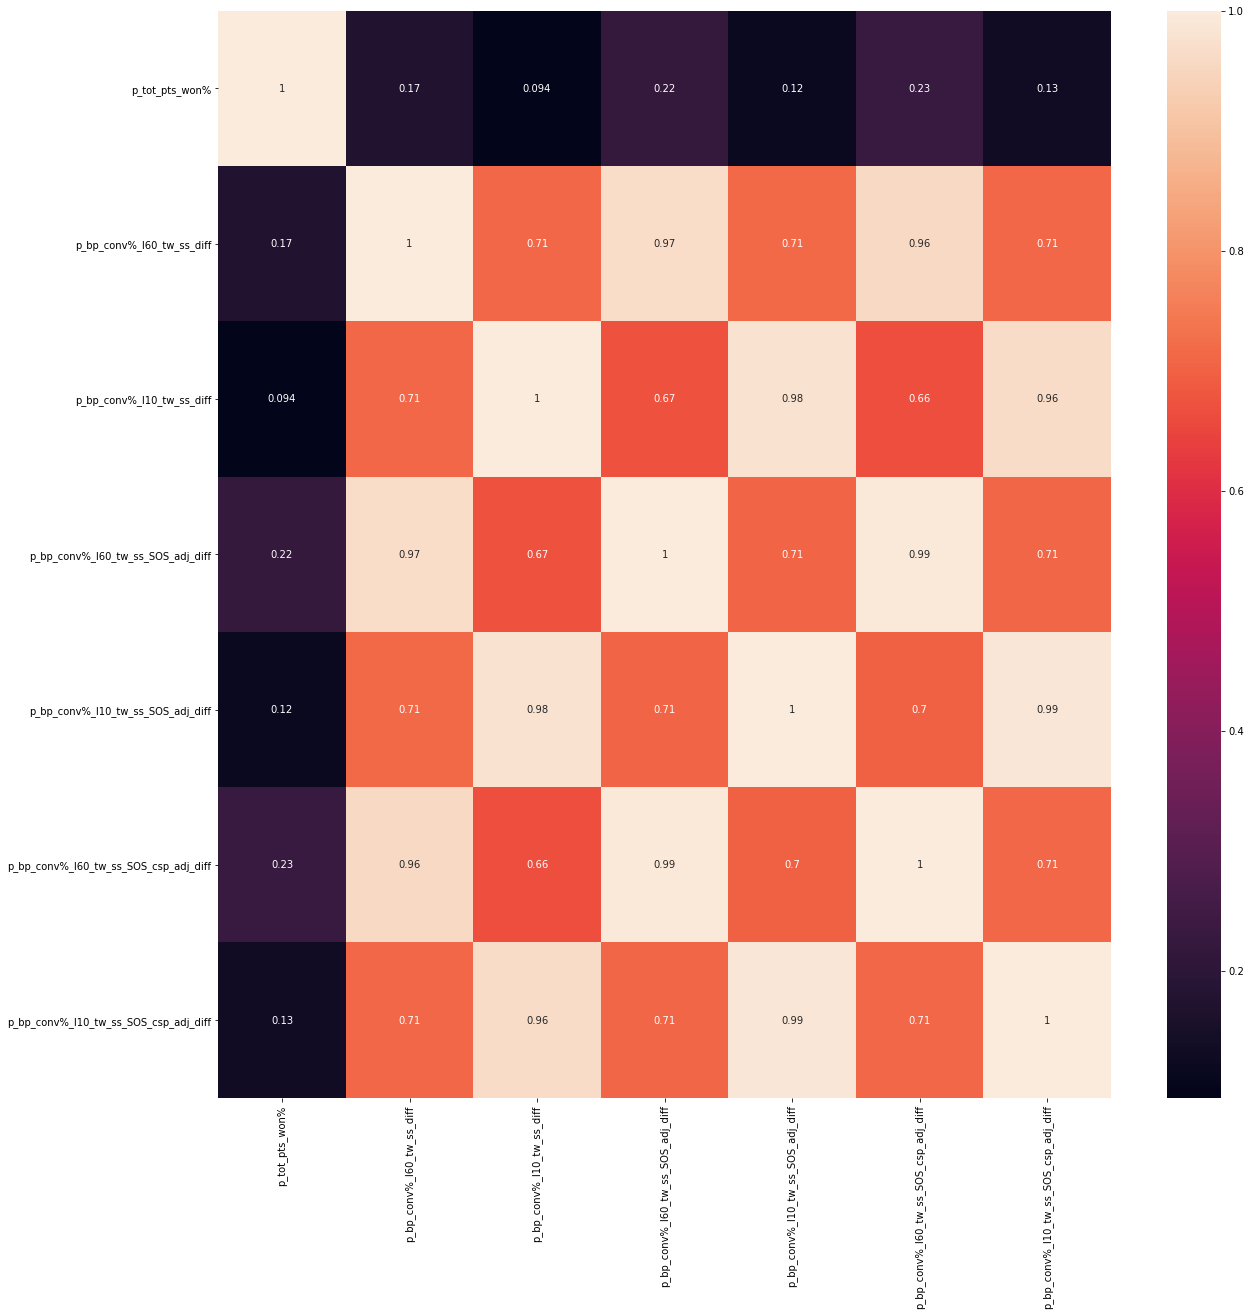

In [41]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_bp_conv.corr(), annot = True);

Key Observations:
* Strength of Schedule Adjusted, CSP-Adjusted version of the long-term (l60) feature has a moderately strong (.23) correlation to target. This is the same strength as the best version of the break points saved feature. 
* In contrast, on hard courts (.24 vs .19 for BPS vs BPC SOS/CSP feature versionnn) saving break points might be more repeatable and predictive a skill than converting them, even when controlling for opposition quality and court speed. Not surprising given the dominance of serve on that surface but not on clay.

### 13. Target Feature vs First Serve Percentage Performance Features

In [42]:
df_filter_1st_sv_pct = df_filter[["p_tot_pts_won%", "p_1st_sv%_l60_tw_ss_diff", "p_1st_sv%_l10_tw_ss_diff", "p_1st_sv%_l60_tw_ss_SOS_adj_diff", "p_1st_sv%_l10_tw_ss_SOS_adj_diff", "p_1st_sv%_l60_tw_ss_SOS_csp_adj_diff", "p_1st_sv%_l10_tw_ss_SOS_csp_adj_diff", "p_1st_sv%_yielded_l60_tw_ss_diff", "p_1st_sv%_yielded_l10_tw_ss_diff", "p_1st_sv%_yielded_l60_tw_ss_SOS_adj_diff", "p_1st_sv%_yielded_l10_tw_ss_SOS_adj_diff", "p_1st_sv%_yielded_l60_tw_ss_SOS_csp_adj_diff", "p_1st_sv%_yielded_l10_tw_ss_SOS_csp_adj_diff"]]

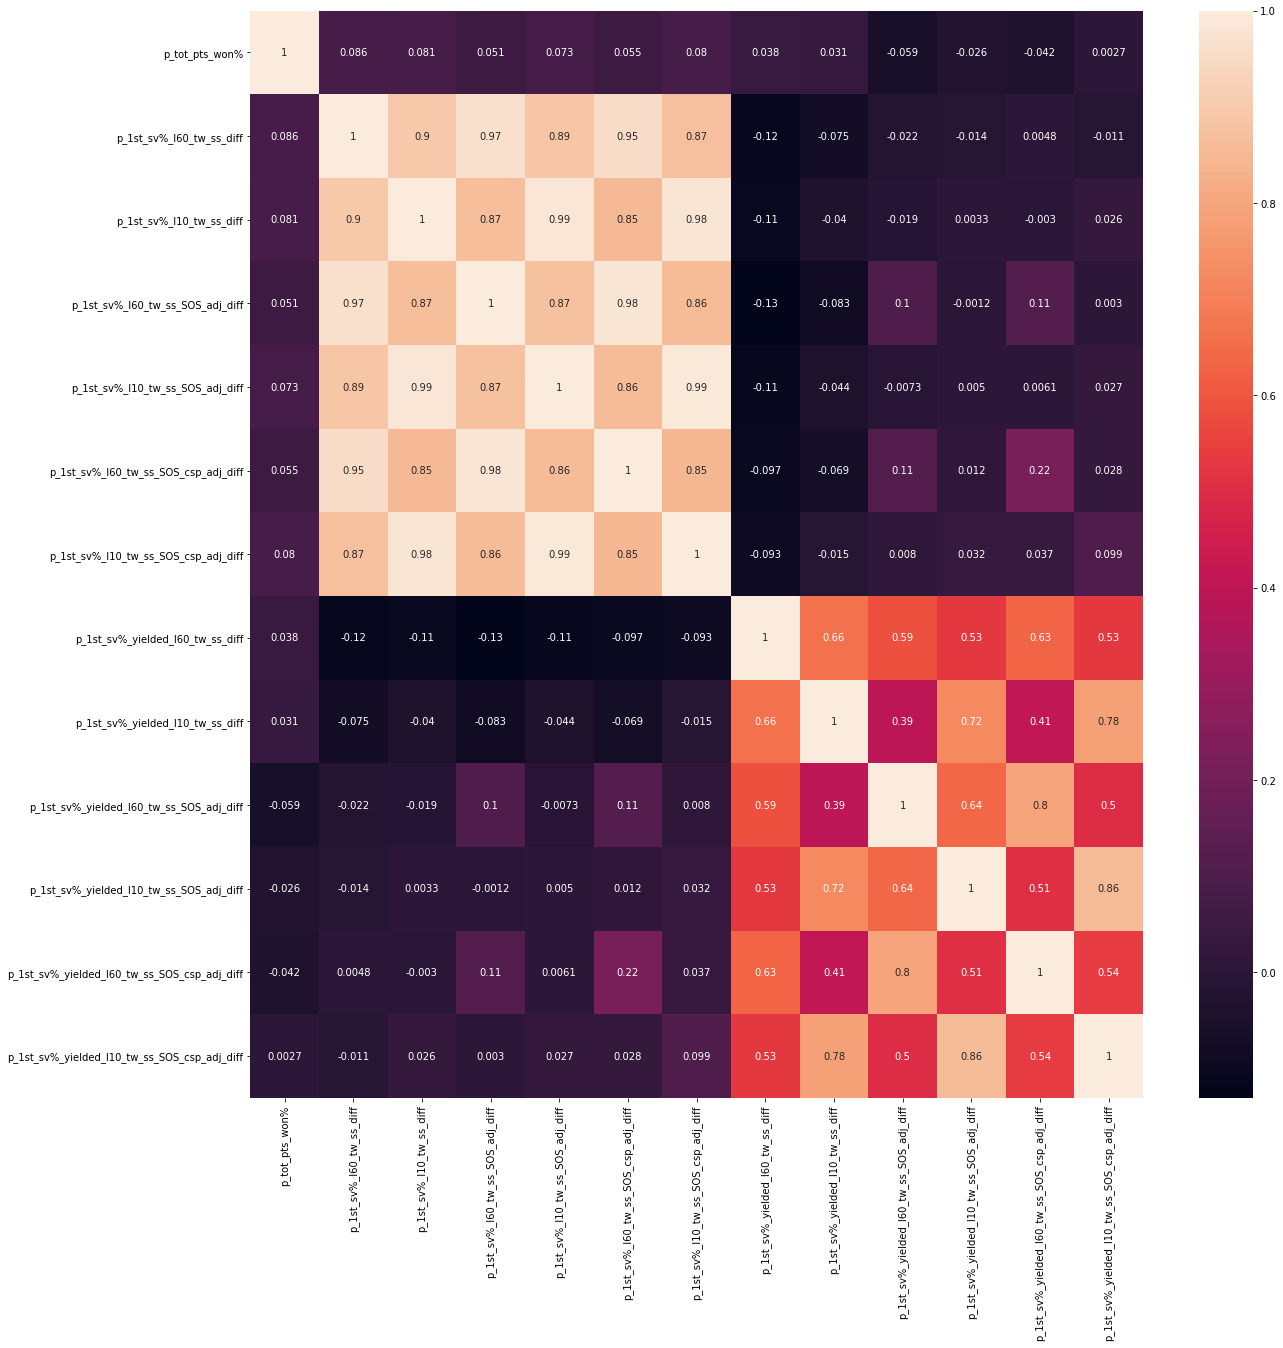

In [43]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_1st_sv_pct.corr(), annot = True);

Key Observations:
* Strength of schedule adjustment seems to just add noise to first serve percentage features. I was hoping to tease out the effect of playing opponents with strong returns (ie, baiting into going for too much) by employing SOS adjustment here.

### 14. Target Feature vs Serve Efficiency Ratio Performance Features (non-IO Diff)

In [44]:
df_filter_sv_effic_non_IO = df_filter[["p_tot_pts_won%", "p_ace_df%_ratio_l60_tw_ss_diff", "p_ace_df%_ratio_l10_tw_ss_diff", "p_ace_df%_ratio_l60_tw_ss_SOS_adj_diff", "p_ace_df%_ratio_l10_tw_ss_SOS_adj_diff",  "p_ace_df%_ratio_l60_tw_ss_SOS_adj_csp_diff", "p_ace_df%_ratio_l10_tw_ss_SOS_adj_csp_diff", "p_1stSvWon_1stSv%_ratio_l60_tw_ss_diff", "p_1stSvWon_1stSv%_ratio_l10_tw_ss_diff", "p_1stSvWon_1stSv%_ratio_l60_tw_ss_SOS_adj_diff", "p_1stSvWon_1stSv%_ratio_l10_tw_ss_SOS_adj_diff", "p_1stSvWon_1stSv%_ratio_l60_tw_ss_SOS_adj_csp_diff", "p_1stSvWon_1stSv%_ratio_l10_tw_ss_SOS_adj_csp_diff", "p_ace_1stSv%_ratio_l60_tw_ss_diff", "p_ace_1stSv%_ratio_l10_tw_ss_diff", "p_ace_1stSv%_ratio_l60_tw_ss_SOS_adj_diff", "p_ace_1stSv%_ratio_l10_tw_ss_SOS_adj_diff", "p_ace_1stSv%_ratio_l60_tw_ss_SOS_csp_adj_diff", "p_ace_1stSv%_ratio_l10_tw_ss_SOS_csp_adj_diff", "p_df_SvPtsWon%_ratio_l60_tw_ss_diff", "p_df_SvPtsWon%_ratio_l10_tw_ss_diff", "p_df_SvPtsWon%_ratio_l60_tw_ss_SOS_adj_diff", "p_df_SvPtsWon%_ratio_l10_tw_ss_SOS_adj_diff", "p_df_SvPtsWon%_ratio_l60_tw_ss_SOS_adj_csp_diff", "p_df_SvPtsWon%_ratio_l10_tw_ss_SOS_adj_csp_diff"]]

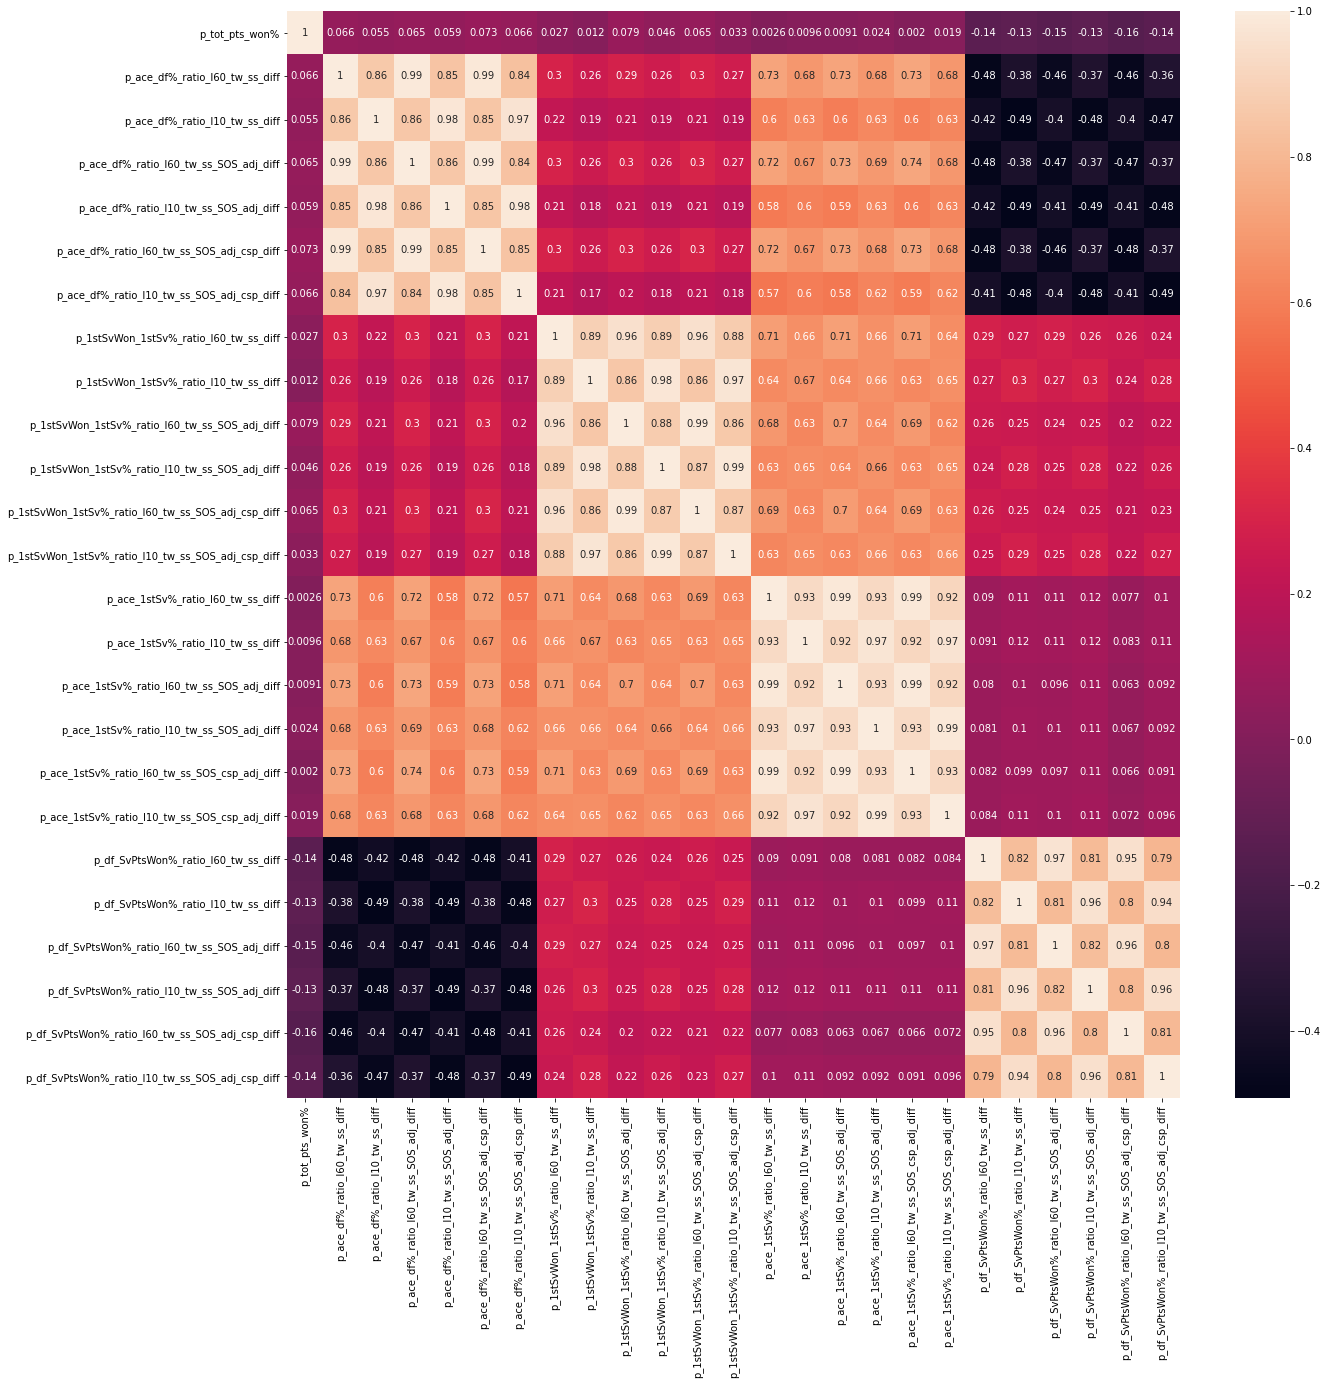

In [45]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_sv_effic_non_IO.corr(), annot = True);

Key Observations:
* Ace to DF ratio player differentials and DF to past serve points won ratio player differentials have decent correlations with target. Unlike on hard courts, the DF ratio has a stronger correlation to target than the ACE ratio (idea is that mistakes are punished on clay courts more than risks are rewarded, at least in serving and returing). Hopeful that these have some impact on prediction quality above and beyond the component parts.

Key Observations:
* Ace to DF ratio player differentials and Df to serve points won ratio player differentials have decent correlations with target. Hopeful that these have some impact on prediction quality above and beyond the component parts. Close in strength to non-IO variants. 

### 16. Target Feature vs "Offense vs Defense" and "Defense vs Offense" Features (SOS-Adjusted Versions Only)

In [46]:
df_filter_O_vs_D_SOS = df_filter[["p_tot_pts_won%", "p_sv_opp_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_sv_opp_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_sv_opp_1st_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_sv_opp_1st_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_sv_opp_2nd_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_sv_opp_2nd_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_ret_opp_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_ret_opp_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_ret_opp_1st_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_ret_opp_1st_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_ret_opp_2nd_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_ret_opp_2nd_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_ace_opp_aced%_l60_tw_ss_SOS_adj_diff", "p_ace_opp_aced%_l10_tw_ss_SOS_adj_diff", "p_aced_opp_ace%_l60_tw_ss_SOS_adj_diff", "p_aced_opp_ace%_l10_tw_ss_SOS_adj_diff", "p_df_opp_df_induce%_l60_tw_ss_SOS_adj_diff", "p_df_opp_df_induce%_l10_tw_ss_SOS_adj_diff", "p_dfinduce_opp_df%_l60_tw_ss_SOS_adj_diff", "p_dfinduce_opp_df%_l10_tw_ss_SOS_adj_diff", "p_bpsave_opp_bpconv%_l60_tw_ss_SOS_adj_diff", "p_bpsave_opp_bpconv%_l10_tw_ss_SOS_adj_diff", "p_bpconv_opp_bpsave%_l60_tw_ss_SOS_adj_diff", "p_bpconv_opp_bpsave%_l10_tw_ss_SOS_adj_diff"]]

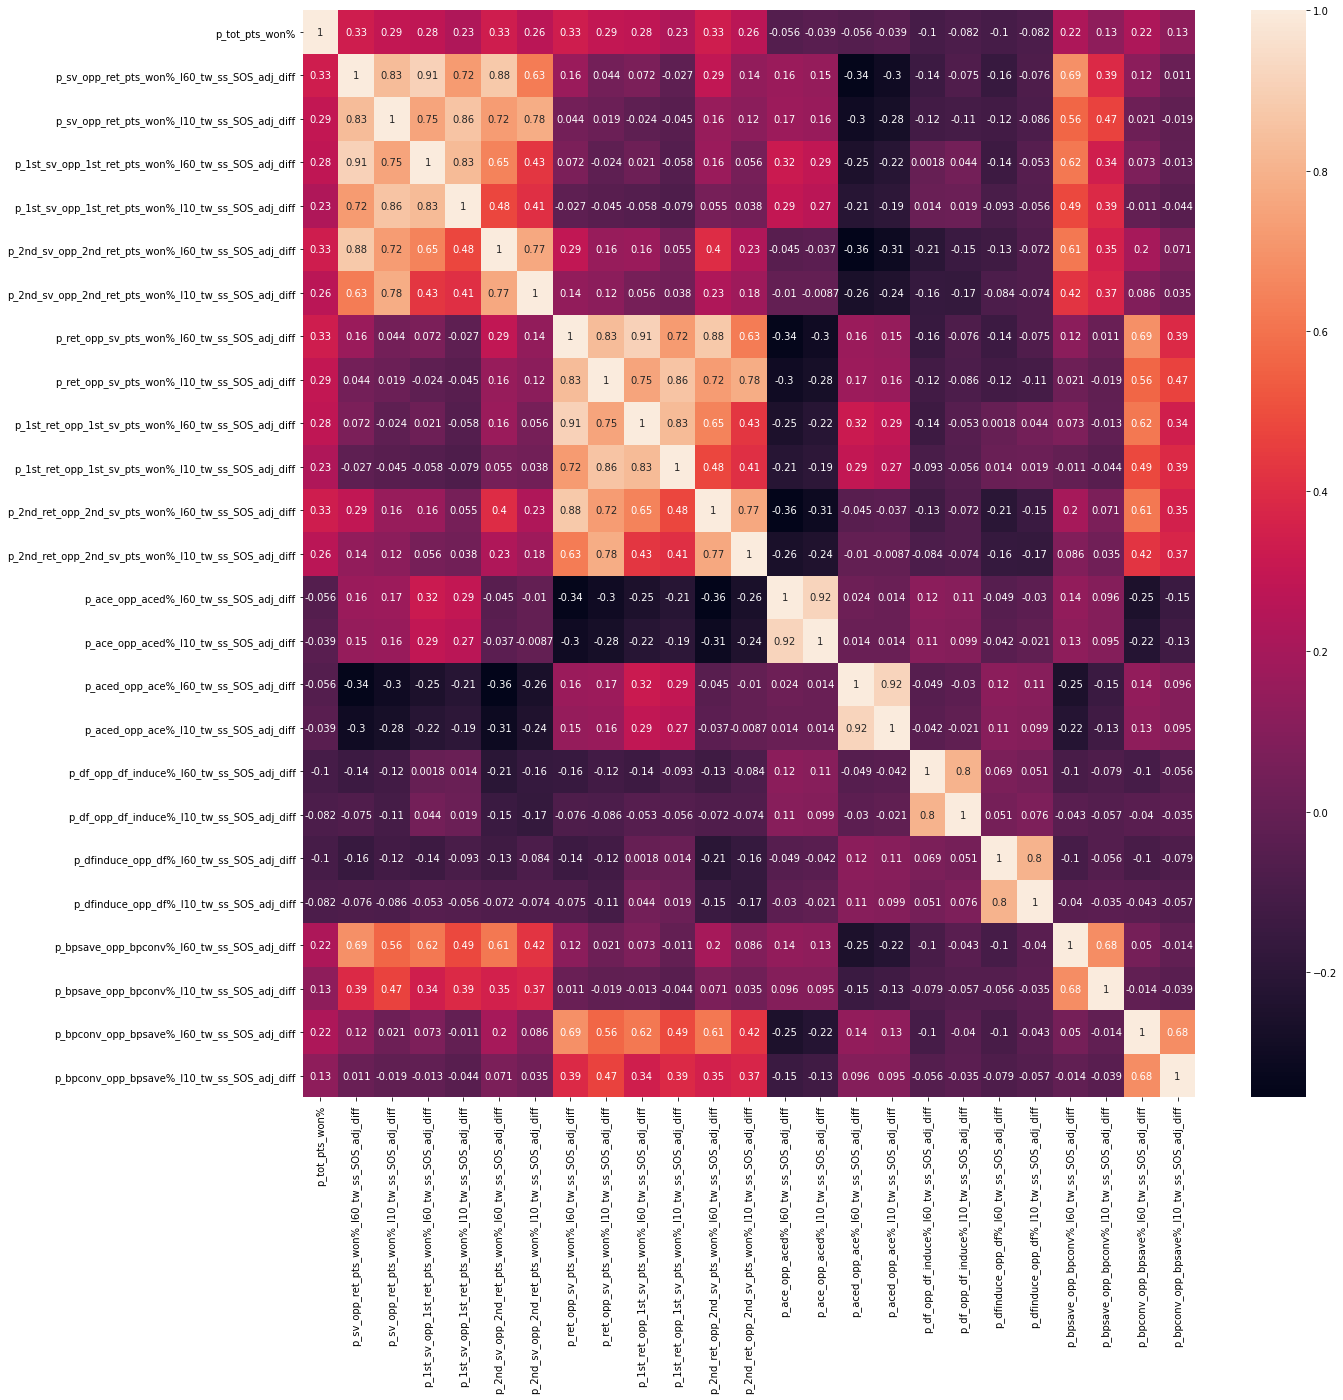

In [47]:
#Heatmap of correlations for pts_won% vs "differential features"
plt.subplots(figsize=(20,20))
sns.heatmap(df_filter_O_vs_D_SOS.corr(), annot = True);

Key Observations:
* There's some fairly strong correlations to target in these "Offense vs Defense" and "Defense vs Offense" differential features. Strongest (0.33) is player serve vs opponent return points (and vice versa for the reciprocal). Interestingly, correlations are stronger for second serve than for first serve.  
* In the model, we will only include "Offense vs Defense" features so as not to duplicate features.

### Scatterplots of Target Feature Vs Predictive Features

In [48]:
### Let's look at some scatterplots of putatively predictive differential features vs the target feature of pts won%
def scatterplots(columns, ncol=None, figsize=(20, 10)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'p_tot_pts_won%', data=df_filter, alpha=0.5)
        ax.set(xlabel=col, ylabel='p_tot_pts_won%')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

### Target Feature vs Past Total Points Won Features Scatterplots

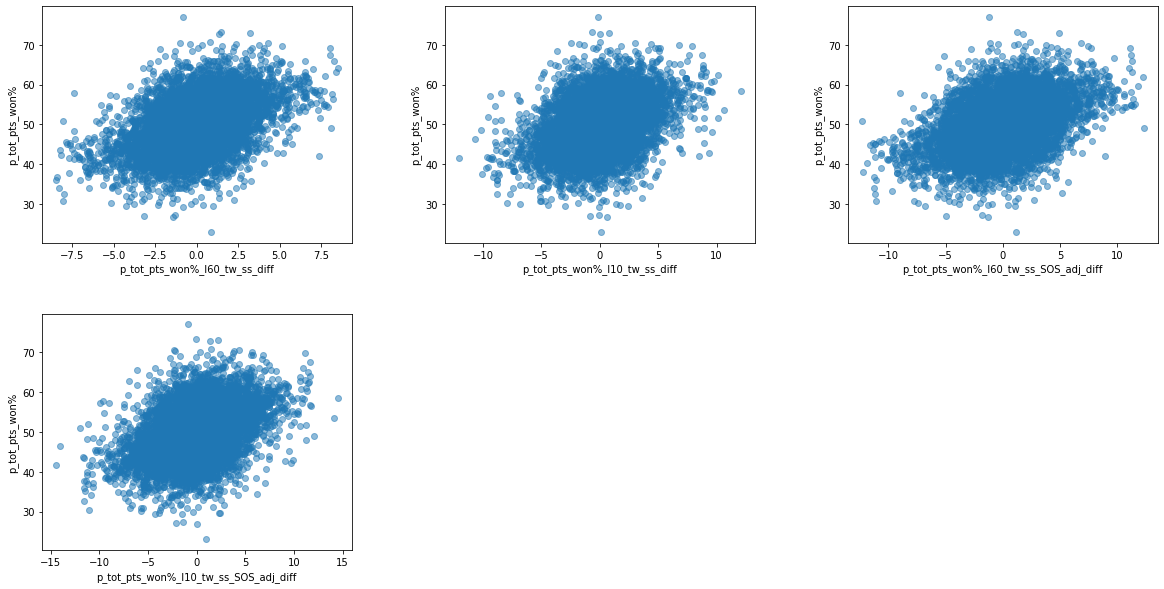

In [50]:
scatterplots(["p_tot_pts_won%_l60_tw_ss_diff", "p_tot_pts_won%_l10_tw_ss_diff", "p_tot_pts_won%_l60_tw_ss_SOS_adj_diff", "p_tot_pts_won%_l10_tw_ss_SOS_adj_diff"], ncol=3)

### Target Feature vs Ranking-Related and Matchup-Specific Performance Features 

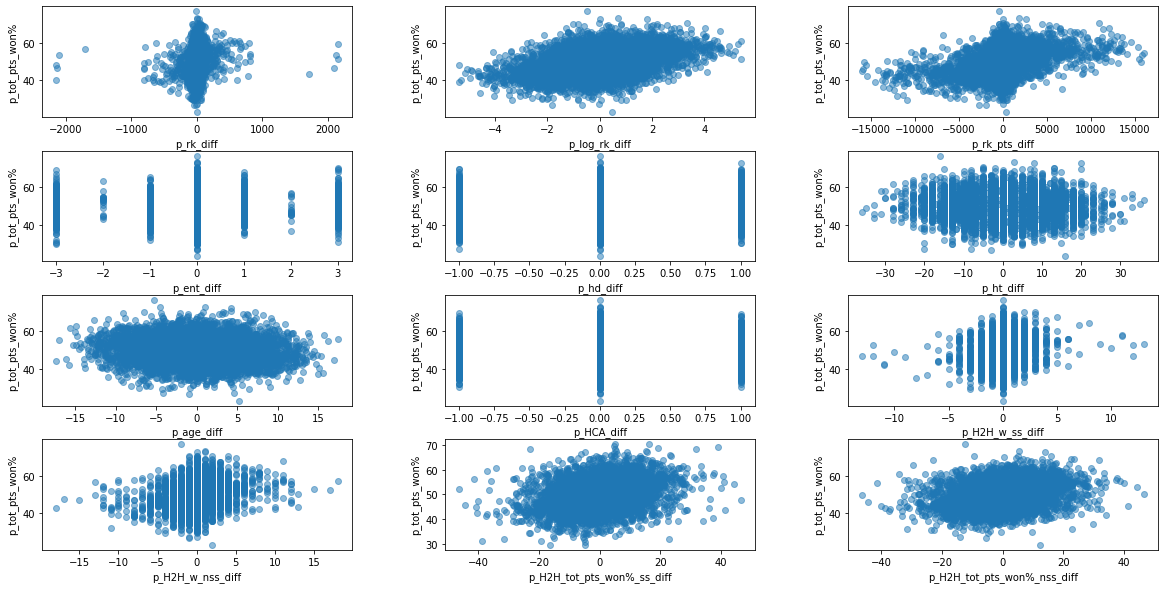

In [51]:
scatterplots(["p_rk_diff", "p_log_rk_diff", "p_rk_pts_diff", "p_ent_diff", "p_hd_diff", "p_ht_diff", "p_age_diff", "p_HCA_diff", "p_H2H_w_ss_diff", "p_H2H_w_nss_diff", "p_H2H_tot_pts_won%_ss_diff", "p_H2H_tot_pts_won%_nss_diff"], ncol=3)

### Target Feature vs Travel, Surface Adaptation, Stamina and Fatigue-Related Features

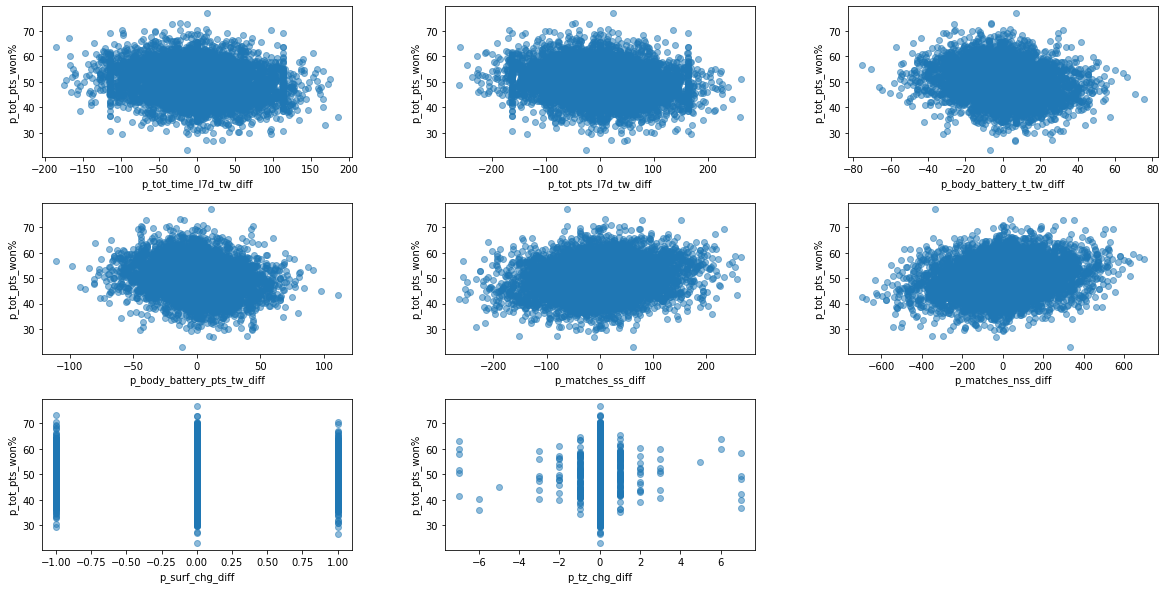

In [52]:
scatterplots(["p_tot_time_l7d_tw_diff", "p_tot_pts_l7d_tw_diff", "p_body_battery_t_tw_diff", "p_body_battery_pts_tw_diff", "p_matches_ss_diff", "p_matches_nss_diff", "p_surf_chg_diff", "p_tz_chg_diff"], ncol=3)

### Target Feature vs Past % of Serve Points Won Per Player Features 

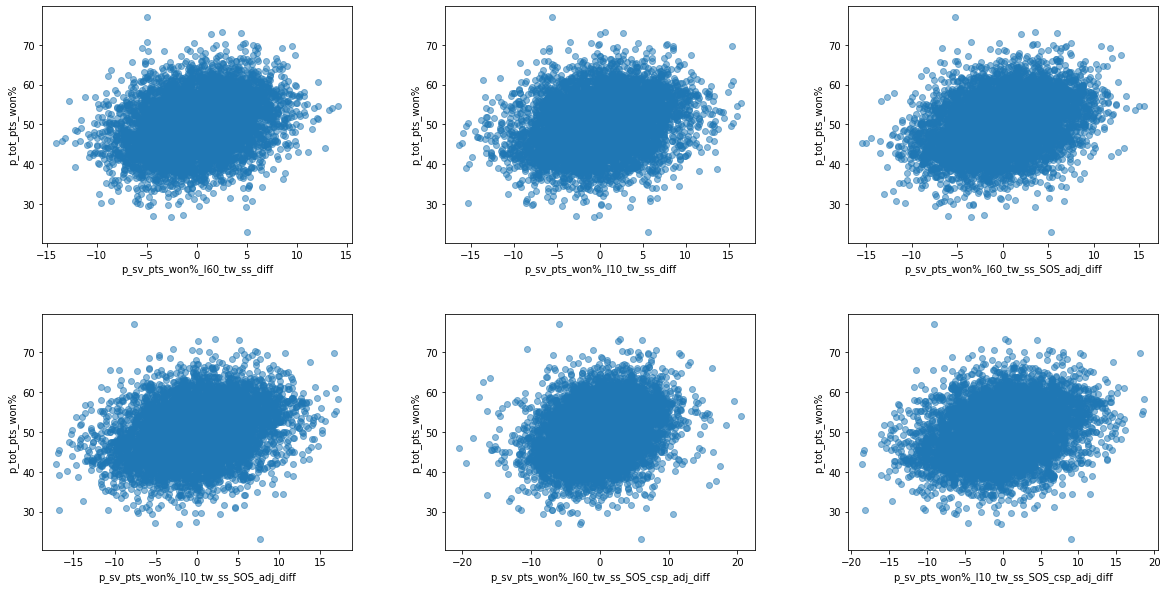

In [53]:
scatterplots(["p_sv_pts_won%_l60_tw_ss_diff", "p_sv_pts_won%_l10_tw_ss_diff", "p_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_sv_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_sv_pts_won%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs Past % of First and Second Serve Points Won Per Player Features 

In [54]:
### Let's look at some scatterplots of putatively predictive differential features vs the target feature of pts won%
def scatterplots(columns, ncol=None, figsize=(20, 20)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.8, hspace= 0.8)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'p_tot_pts_won%', data=df_filter, alpha=0.5)
        ax.set(xlabel=col, ylabel='p_tot_pts_won%')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

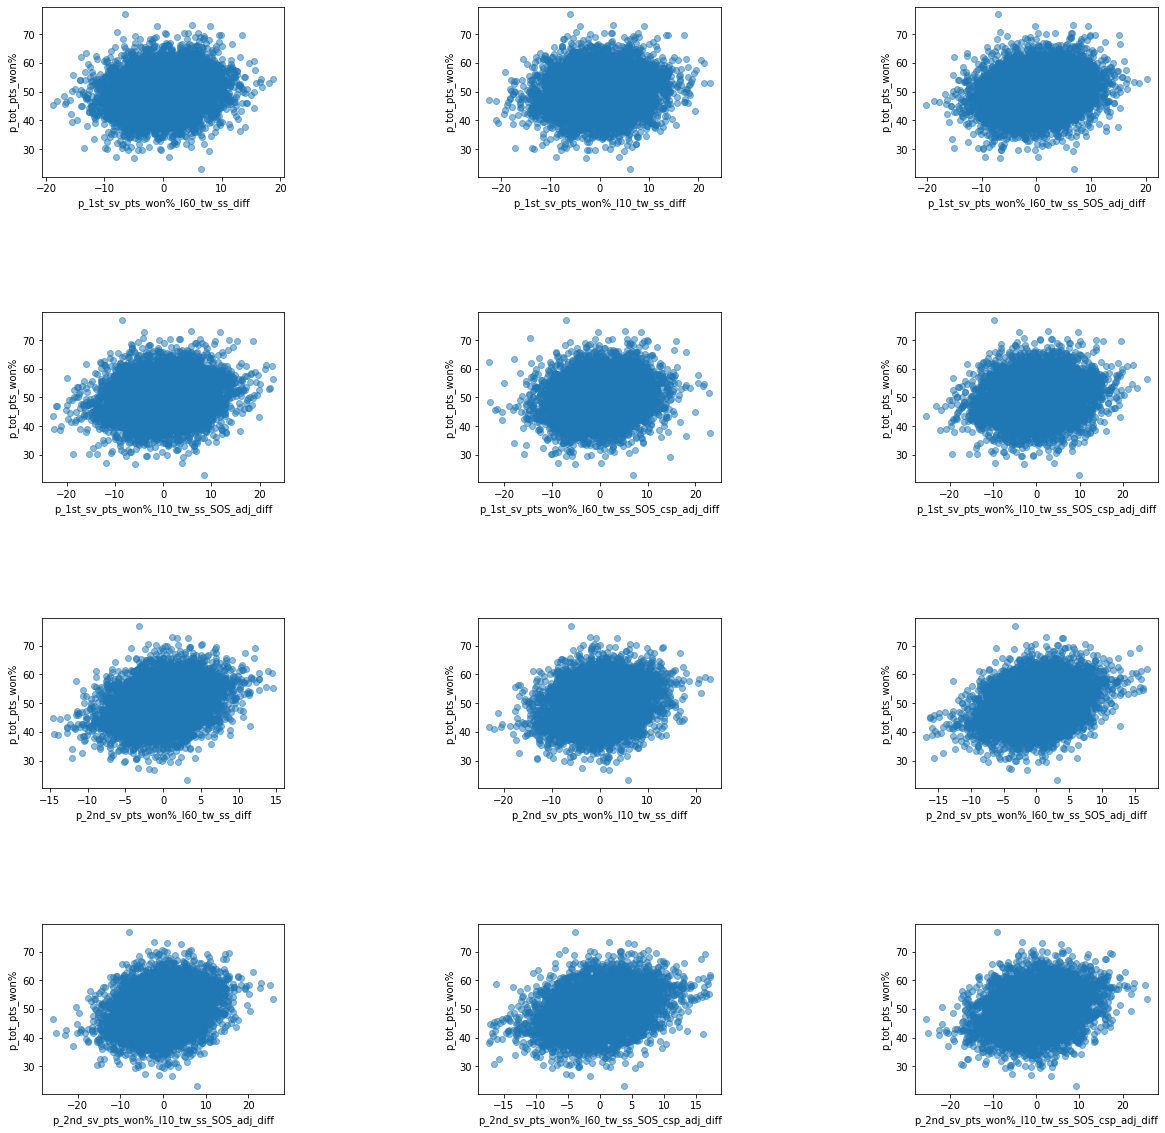

In [55]:
scatterplots(["p_1st_sv_pts_won%_l60_tw_ss_diff", "p_1st_sv_pts_won%_l10_tw_ss_diff", "p_1st_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_sv_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_1st_sv_pts_won%_l10_tw_ss_SOS_csp_adj_diff", "p_2nd_sv_pts_won%_l60_tw_ss_diff", "p_2nd_sv_pts_won%_l10_tw_ss_diff", "p_2nd_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_sv_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_2nd_sv_pts_won%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs Past % of Return Points Won Per Player Features 

In [56]:
### Let's look at some scatterplots of putatively predictive differential features vs the target feature of pts won%
def scatterplots(columns, ncol=None, figsize=(20, 10)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'p_tot_pts_won%', data=df_filter, alpha=0.5)
        ax.set(xlabel=col, ylabel='p_tot_pts_won%')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

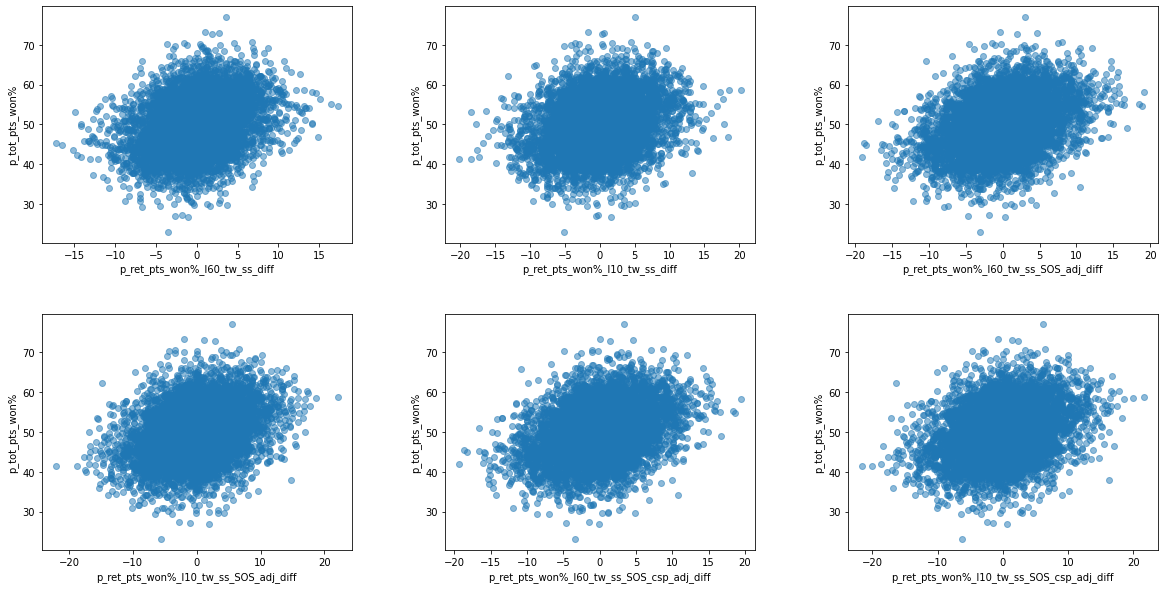

In [57]:
scatterplots(["p_ret_pts_won%_l60_tw_ss_diff", "p_ret_pts_won%_l10_tw_ss_diff", "p_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_ret_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_ret_pts_won%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs Past % of First and Second Return Points Won Per Player Features 

In [58]:
### Let's look at some scatterplots of putatively predictive differential features vs the target feature of pts won%
def scatterplots(columns, ncol=None, figsize=(20, 20)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.8, hspace= 0.8)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'p_tot_pts_won%', data=df_filter, alpha=0.5)
        ax.set(xlabel=col, ylabel='p_tot_pts_won%')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

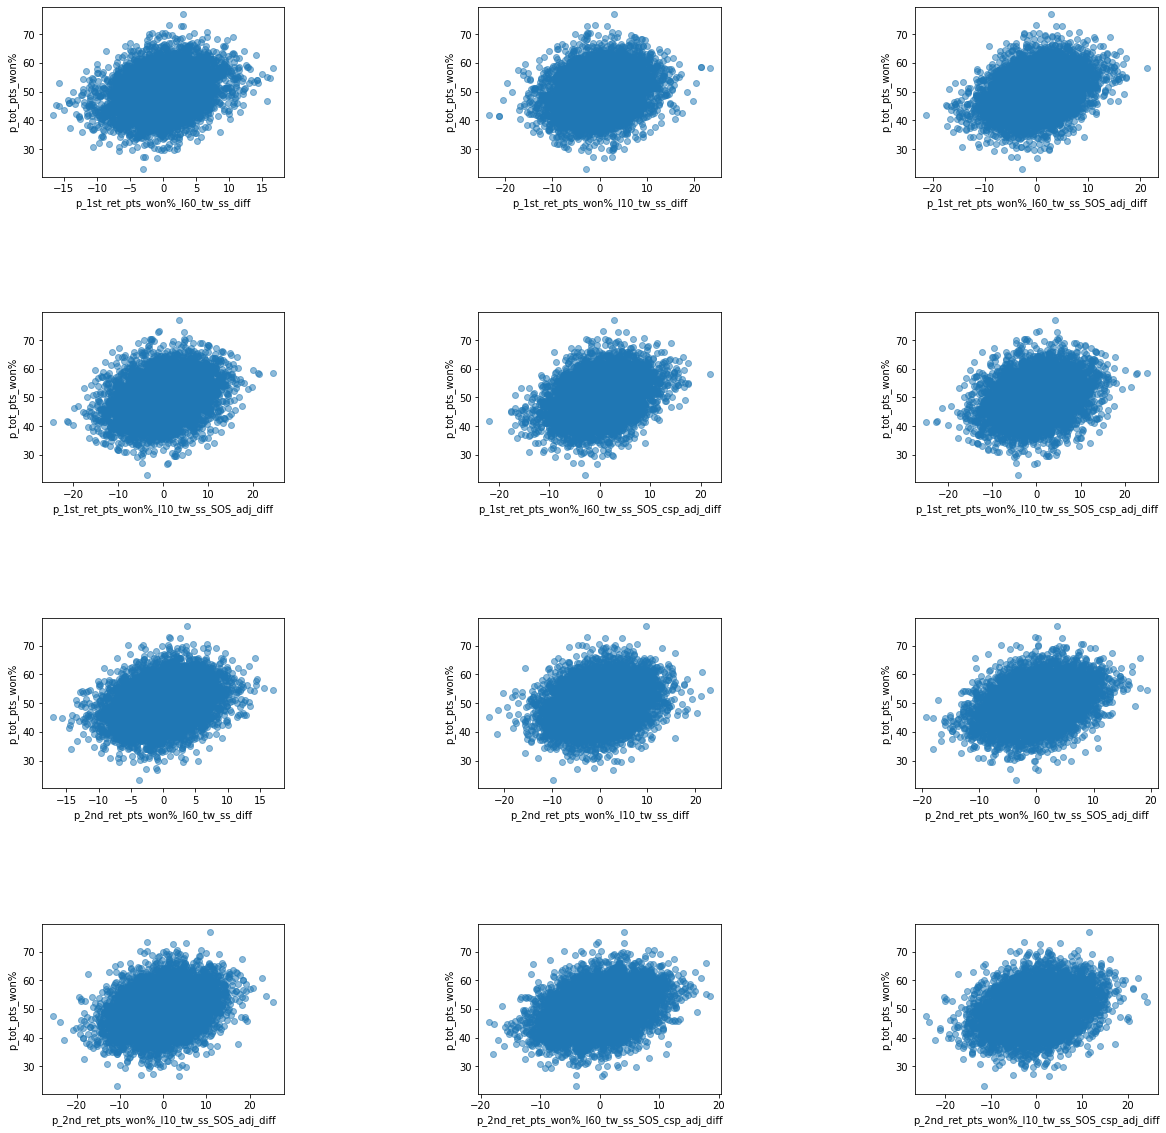

In [59]:
scatterplots(["p_1st_ret_pts_won%_l60_tw_ss_diff", "p_1st_ret_pts_won%_l10_tw_ss_diff", "p_1st_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_ret_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_1st_ret_pts_won%_l10_tw_ss_SOS_csp_adj_diff", "p_2nd_ret_pts_won%_l60_tw_ss_diff", "p_2nd_ret_pts_won%_l10_tw_ss_diff", "p_2nd_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_ret_pts_won%_l60_tw_ss_SOS_csp_adj_diff", "p_2nd_ret_pts_won%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs Past Implied Win Probability Features

In [60]:
### Let's look at some scatterplots of putatively predictive differential features vs the target feature of pts won%
def scatterplots(columns, ncol=None, figsize=(20, 10)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'p_tot_pts_won%', data=df_filter, alpha=0.5)
        ax.set(xlabel=col, ylabel='p_tot_pts_won%')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

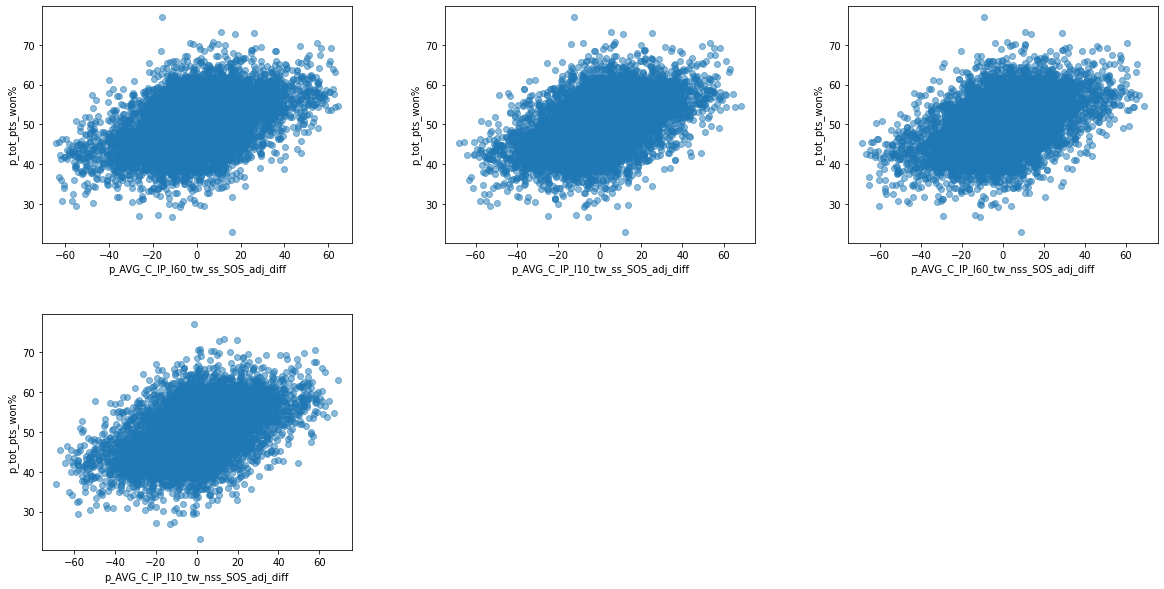

In [61]:
scatterplots(["p_AVG_C_IP_l60_tw_ss_SOS_adj_diff", "p_AVG_C_IP_l10_tw_ss_SOS_adj_diff", "p_AVG_C_IP_l60_tw_nss_SOS_adj_diff", "p_AVG_C_IP_l10_tw_nss_SOS_adj_diff"], ncol=3)

### Target Feature vs Past Ace Performance Features

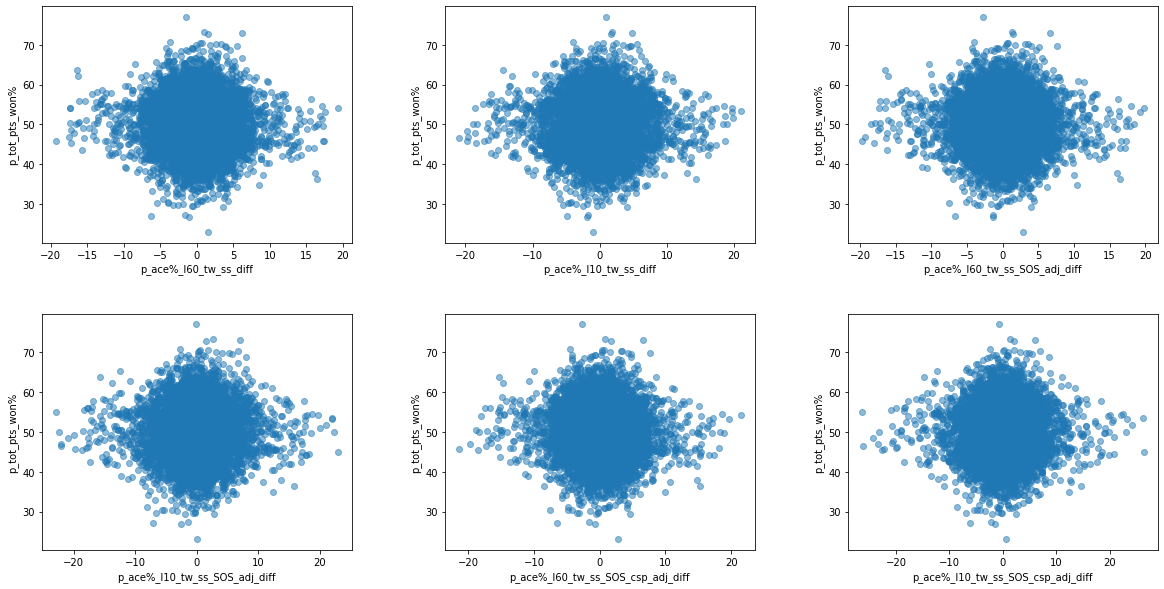

In [62]:
scatterplots(["p_ace%_l60_tw_ss_diff", "p_ace%_l10_tw_ss_diff", "p_ace%_l60_tw_ss_SOS_adj_diff", "p_ace%_l10_tw_ss_SOS_adj_diff", "p_ace%_l60_tw_ss_SOS_csp_adj_diff", "p_ace%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs Past Double Fault Performance Features 

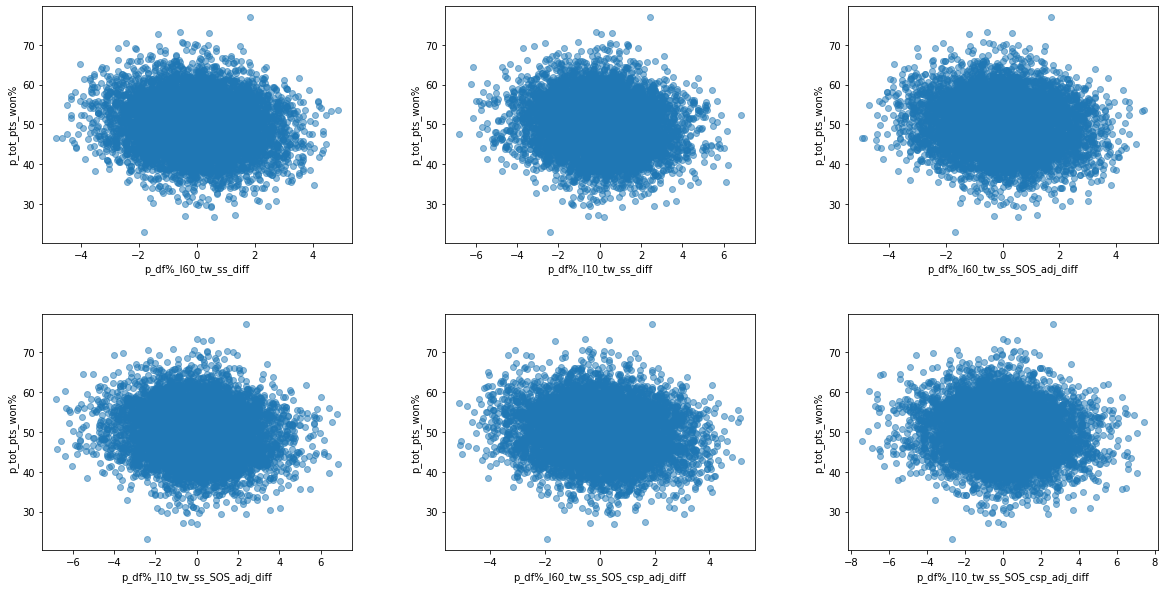

In [63]:
scatterplots(["p_df%_l60_tw_ss_diff", "p_df%_l10_tw_ss_diff", "p_df%_l60_tw_ss_SOS_adj_diff", "p_df%_l10_tw_ss_SOS_adj_diff", "p_df%_l60_tw_ss_SOS_csp_adj_diff", "p_df%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs Past Break Point Saved as Server Performance Features 

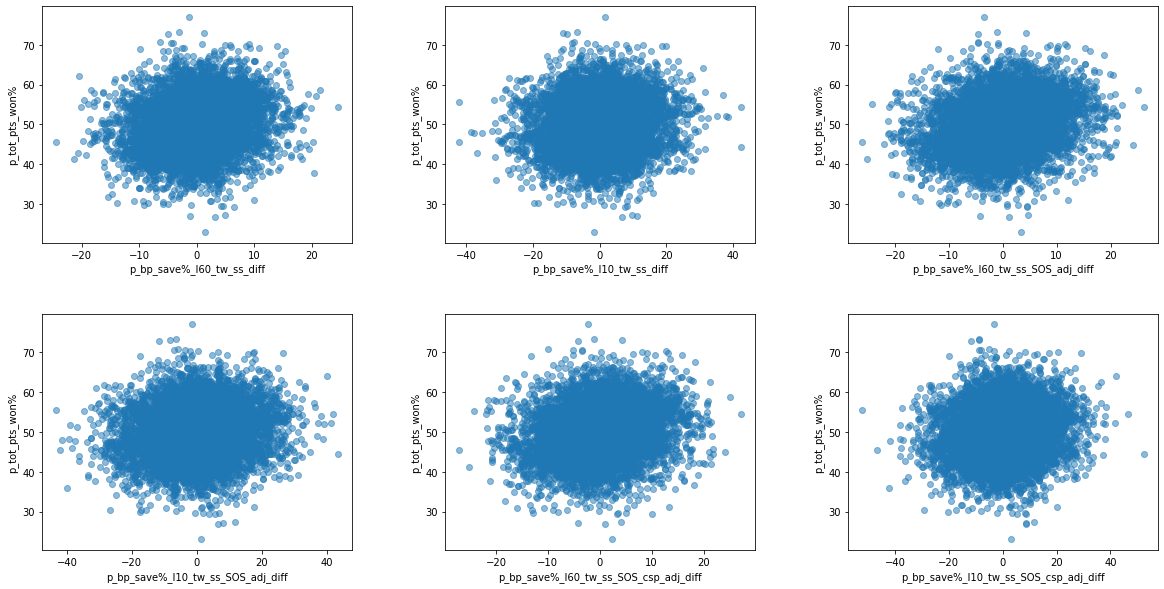

In [64]:
scatterplots(["p_bp_save%_l60_tw_ss_diff", "p_bp_save%_l10_tw_ss_diff", "p_bp_save%_l60_tw_ss_SOS_adj_diff", "p_bp_save%_l10_tw_ss_SOS_adj_diff", "p_bp_save%_l60_tw_ss_SOS_csp_adj_diff", "p_bp_save%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs Past Break Point Converted as Server Performance Features 

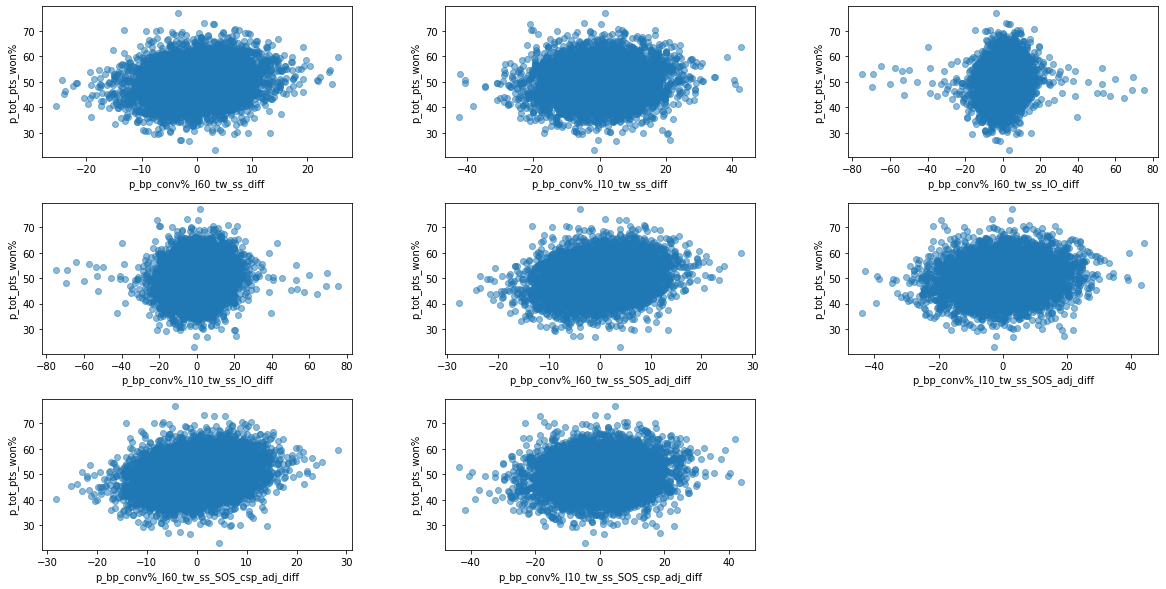

In [65]:
scatterplots(["p_bp_conv%_l60_tw_ss_diff", "p_bp_conv%_l10_tw_ss_diff", "p_bp_conv%_l60_tw_ss_IO_diff", "p_bp_conv%_l10_tw_ss_IO_diff", "p_bp_conv%_l60_tw_ss_SOS_adj_diff", "p_bp_conv%_l10_tw_ss_SOS_adj_diff", "p_bp_conv%_l60_tw_ss_SOS_csp_adj_diff", "p_bp_conv%_l10_tw_ss_SOS_csp_adj_diff"], ncol=3)

### Target Feature vs First Serve Percentage Performance Features

In [66]:
### Let's look at some scatterplots of putatively predictive differential features vs the target feature of pts won%
def scatterplots(columns, ncol=None, figsize=(20, 20)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.8, hspace= 0.8)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'p_tot_pts_won%', data=df_filter, alpha=0.5)
        ax.set(xlabel=col, ylabel='p_tot_pts_won%')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

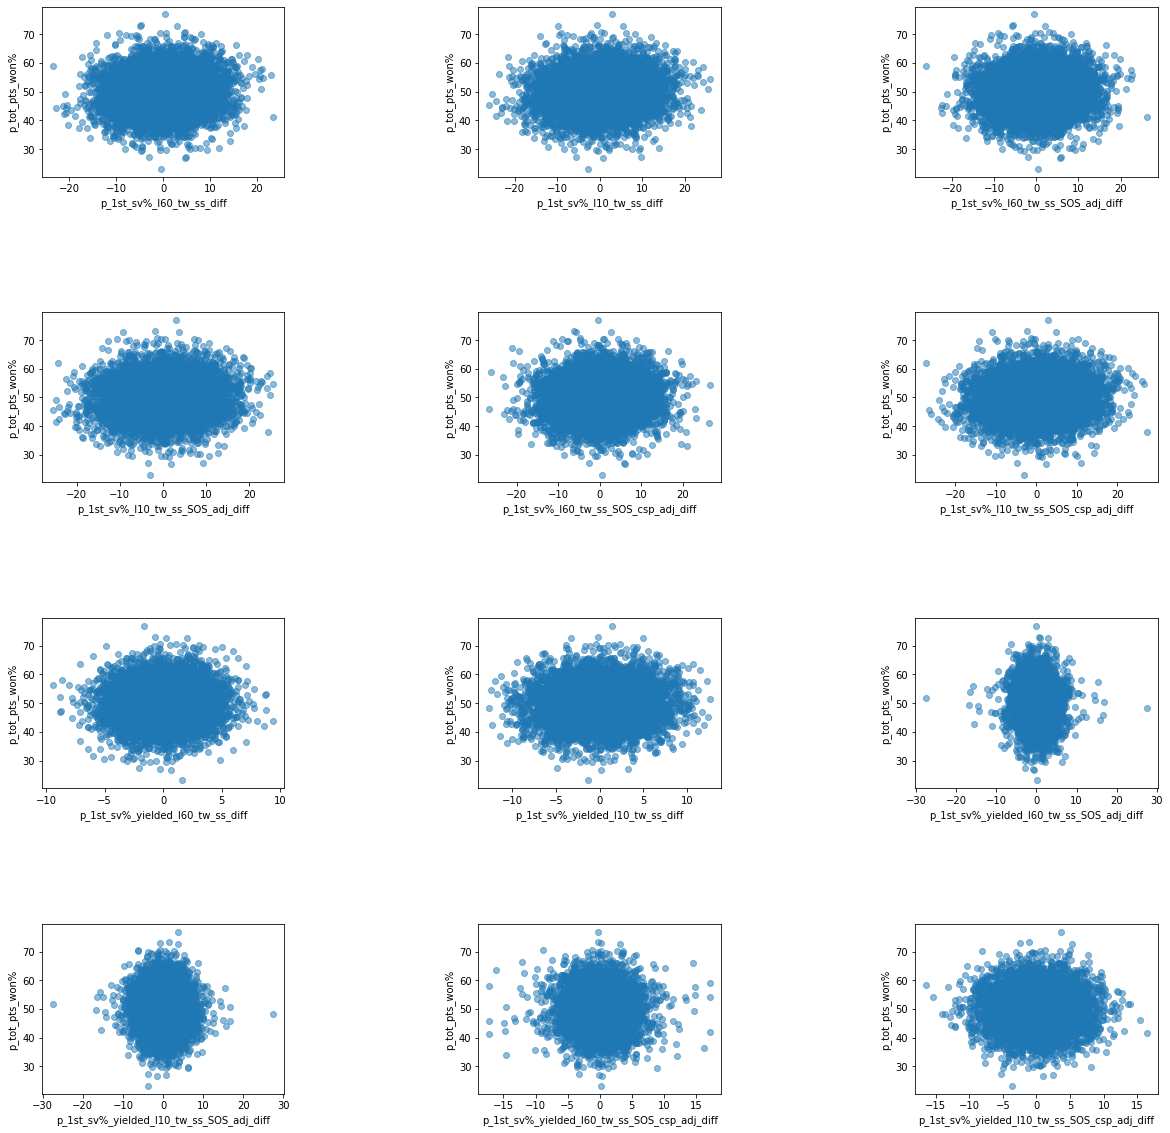

In [67]:
scatterplots(["p_1st_sv%_l60_tw_ss_diff", "p_1st_sv%_l10_tw_ss_diff", "p_1st_sv%_l60_tw_ss_SOS_adj_diff", "p_1st_sv%_l10_tw_ss_SOS_adj_diff", "p_1st_sv%_l60_tw_ss_SOS_csp_adj_diff", "p_1st_sv%_l10_tw_ss_SOS_csp_adj_diff", "p_1st_sv%_yielded_l60_tw_ss_diff", "p_1st_sv%_yielded_l10_tw_ss_diff", "p_1st_sv%_yielded_l60_tw_ss_SOS_adj_diff", "p_1st_sv%_yielded_l10_tw_ss_SOS_adj_diff", "p_1st_sv%_yielded_l60_tw_ss_SOS_csp_adj_diff", "p_1st_sv%_yielded_l10_tw_ss_SOS_csp_adj_diff"],ncol=3)

### Target Feature vs Serve Efficiency Ratio Performance Features (non-IO versions)

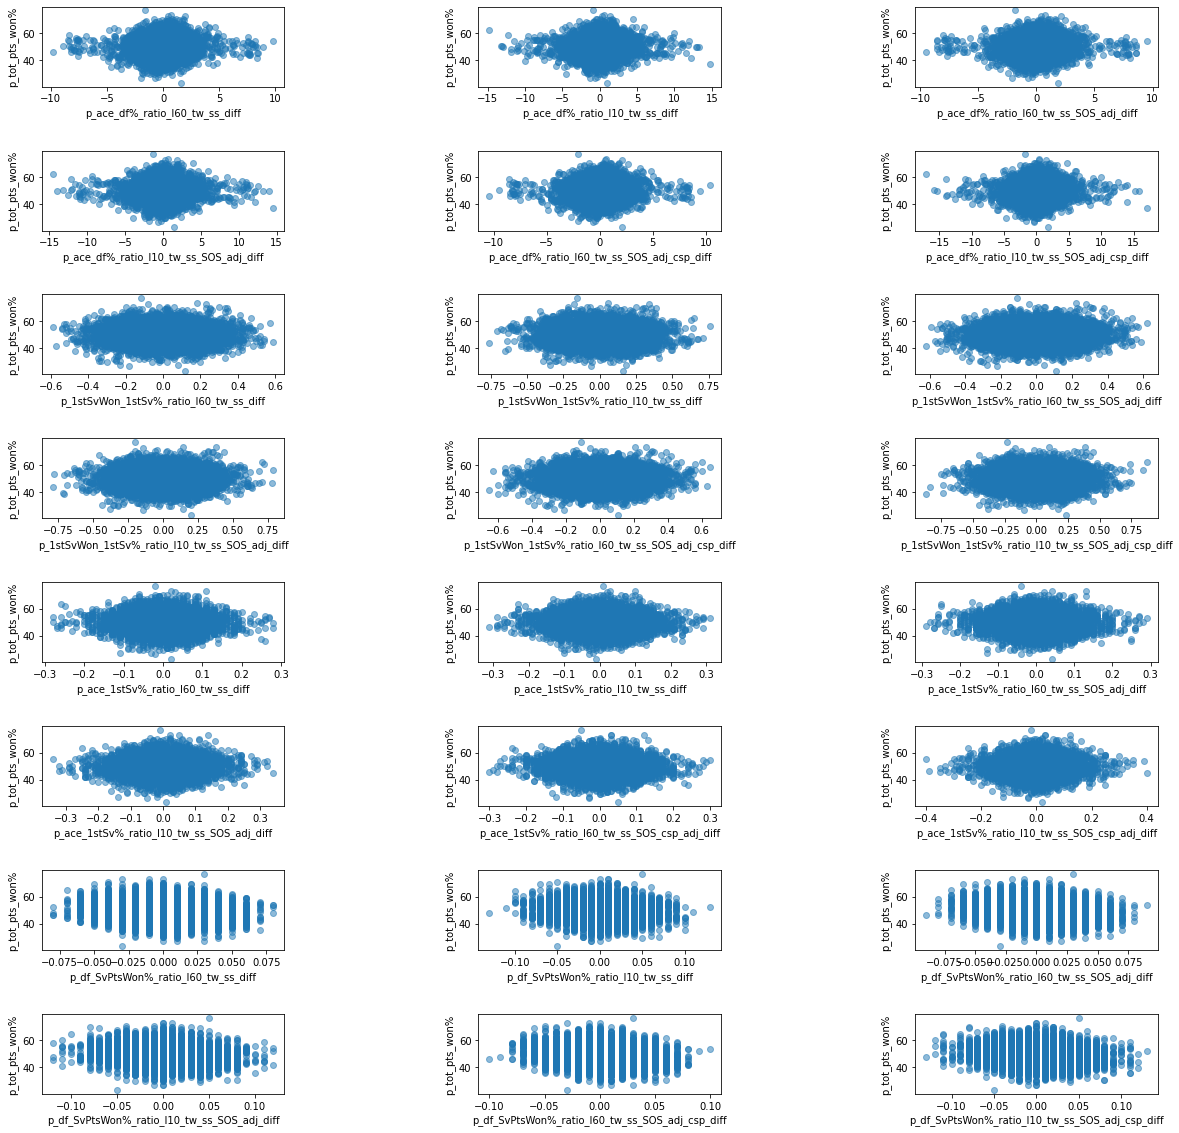

In [68]:
scatterplots(["p_ace_df%_ratio_l60_tw_ss_diff", "p_ace_df%_ratio_l10_tw_ss_diff", "p_ace_df%_ratio_l60_tw_ss_SOS_adj_diff", "p_ace_df%_ratio_l10_tw_ss_SOS_adj_diff", "p_ace_df%_ratio_l60_tw_ss_SOS_adj_csp_diff", "p_ace_df%_ratio_l10_tw_ss_SOS_adj_csp_diff", "p_1stSvWon_1stSv%_ratio_l60_tw_ss_diff", "p_1stSvWon_1stSv%_ratio_l10_tw_ss_diff", "p_1stSvWon_1stSv%_ratio_l60_tw_ss_SOS_adj_diff", "p_1stSvWon_1stSv%_ratio_l10_tw_ss_SOS_adj_diff", "p_1stSvWon_1stSv%_ratio_l60_tw_ss_SOS_adj_csp_diff", "p_1stSvWon_1stSv%_ratio_l10_tw_ss_SOS_adj_csp_diff", "p_ace_1stSv%_ratio_l60_tw_ss_diff", "p_ace_1stSv%_ratio_l10_tw_ss_diff", "p_ace_1stSv%_ratio_l60_tw_ss_SOS_adj_diff", "p_ace_1stSv%_ratio_l10_tw_ss_SOS_adj_diff", "p_ace_1stSv%_ratio_l60_tw_ss_SOS_csp_adj_diff", "p_ace_1stSv%_ratio_l10_tw_ss_SOS_csp_adj_diff", "p_df_SvPtsWon%_ratio_l60_tw_ss_diff", "p_df_SvPtsWon%_ratio_l10_tw_ss_diff", "p_df_SvPtsWon%_ratio_l60_tw_ss_SOS_adj_diff", "p_df_SvPtsWon%_ratio_l10_tw_ss_SOS_adj_diff", "p_df_SvPtsWon%_ratio_l60_tw_ss_SOS_adj_csp_diff", "p_df_SvPtsWon%_ratio_l10_tw_ss_SOS_adj_csp_diff"], ncol=3)

### Target Feature vs "Offense vs Defense" and "Defense vs Offense" Features (SOS-Adjusted Versions Only)

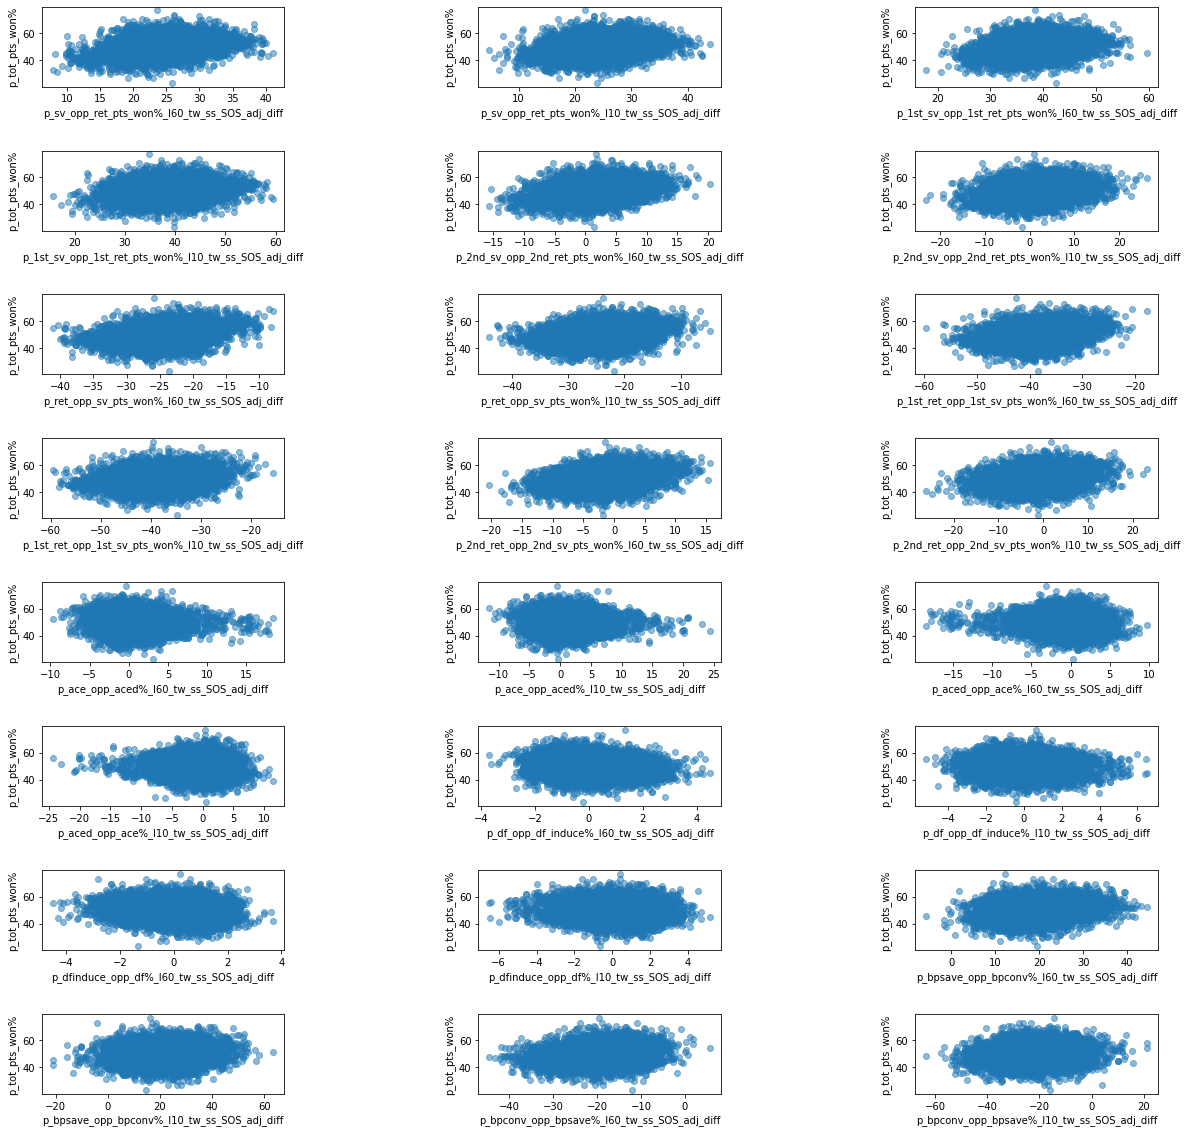

In [69]:
scatterplots(["p_sv_opp_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_sv_opp_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_sv_opp_1st_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_sv_opp_1st_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_sv_opp_2nd_ret_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_sv_opp_2nd_ret_pts_won%_l10_tw_ss_SOS_adj_diff", "p_ret_opp_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_ret_opp_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_1st_ret_opp_1st_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_1st_ret_opp_1st_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_2nd_ret_opp_2nd_sv_pts_won%_l60_tw_ss_SOS_adj_diff", "p_2nd_ret_opp_2nd_sv_pts_won%_l10_tw_ss_SOS_adj_diff", "p_ace_opp_aced%_l60_tw_ss_SOS_adj_diff", "p_ace_opp_aced%_l10_tw_ss_SOS_adj_diff", "p_aced_opp_ace%_l60_tw_ss_SOS_adj_diff", "p_aced_opp_ace%_l10_tw_ss_SOS_adj_diff", "p_df_opp_df_induce%_l60_tw_ss_SOS_adj_diff", "p_df_opp_df_induce%_l10_tw_ss_SOS_adj_diff", "p_dfinduce_opp_df%_l60_tw_ss_SOS_adj_diff", "p_dfinduce_opp_df%_l10_tw_ss_SOS_adj_diff", "p_bpsave_opp_bpconv%_l60_tw_ss_SOS_adj_diff", "p_bpsave_opp_bpconv%_l10_tw_ss_SOS_adj_diff", "p_bpconv_opp_bpsave%_l60_tw_ss_SOS_adj_diff", "p_bpconv_opp_bpsave%_l10_tw_ss_SOS_adj_diff"], ncol=3)